In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import glob
import warnings
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Ransomware-Conti-0acab6c956e35f8d4b37df3e2c381...,38,15,10.105263,0,213.684211,1490,39.210526,8120,213.684211,...,221,26,24,116,0,118,86,0,8,Malware
1,Benign,41,12,13.391828,0,306.374960,2149,52.419385,12561,306.374960,...,222,26,27,118,0,123,88,0,8,Benign
2,Spyware-CWS-0b5f27693d84662626b7367a01c8bc32c8...,42,16,10.452381,0,215.523809,1643,39.119048,9053,220.804878,...,221,26,24,116,0,122,87,0,8,Malware
3,Benign,41,14,12.704947,0,288.463644,2050,50.000000,11827,288.463644,...,222,26,27,118,0,123,88,0,8,Benign
4,Ransomware-Shade-3e30ddddc154e46d42c833c052be0...,40,16,9.475000,0,204.100000,1503,37.575000,8164,204.100000,...,221,26,24,116,0,119,87,0,8,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Trojan-Zeus-2f0eaed78213566b74034c4090df3a6fd9...,37,15,10.162162,0,215.135135,1444,39.027027,7960,215.135135,...,221,26,24,116,0,118,86,0,8,Malware
58592,Spyware-CWS-0b74ad6861c4e82cb8295eb3c6bdb2e7e7...,38,15,9.815789,0,214.210526,1498,39.421053,8140,214.210526,...,221,26,24,116,0,119,86,0,8,Malware
58593,Benign,41,12,12.975610,0,294.926829,2029,49.487805,12092,294.926829,...,222,26,27,118,0,123,88,0,8,Benign
58594,Benign,51,20,11.485621,0,254.858328,2295,44.918269,13020,254.858328,...,222,26,24,118,0,126,87,0,8,Benign


In [5]:
df['Class'].value_counts()

Class
Malware    29298
Benign     29298
Name: count, dtype: int64

In [6]:
df.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [7]:
df['Class'] = df.Class.map({'Benign':0, 'Malware':1})

In [8]:
df['Malware_type'] = ''

# B for benign, T for Trajon, S for Spyware and R for Ransomware
for i, Category in enumerate(df['Category']):
    if Category.startswith('B'):
        df.loc[i, 'Malware_type'] = 0
    elif Category.startswith('T'):
        df.loc[i, 'Malware_type'] = 1
    elif Category.startswith('S'):
        df.loc[i, 'Malware_type'] = 2
    elif Category.startswith('R'):
        df.loc[i, 'Malware_type'] = 3
    else:
        df.loc[i, 'Malware_type'] = 'unknown'

df['Malware_type'] = df['Malware_type'].astype('int64')

# Displaying the final dataframe
df[["Category", "Malware_type"]]

,Category,Malware_type
0,Ransomware-Conti-0acab6c956e35f8d4b37df3e2c381...,3
1,Benign,0
2,Spyware-CWS-0b5f27693d84662626b7367a01c8bc32c8...,2
3,Benign,0
4,Ransomware-Shade-3e30ddddc154e46d42c833c052be0...,3
...,...,...
58591,Trojan-Zeus-2f0eaed78213566b74034c4090df3a6fd9...,1
58592,Spyware-CWS-0b74ad6861c4e82cb8295eb3c6bdb2e7e7...,2
58593,Benign,0
58594,Benign,0


In [9]:
df['Malware_type'].value_counts().sort_index()

Malware_type
0    29298
1     9487
2    10020
3     9791
Name: count, dtype: int64

In [10]:
# Creating a column based on Malware Subtypes

df['Malware_subtype'] = ''

df.loc[df['Category'].str.contains('Benign'), 'Malware_subtype'] = 0
df.loc[df['Category'].str.contains('Zeus'), 'Malware_subtype'] = 1
df.loc[df['Category'].str.contains('Emotet'), 'Malware_subtype'] = 2
df.loc[df['Category'].str.contains('Refroso'), 'Malware_subtype'] = 3
df.loc[df['Category'].str.contains('Scar'), 'Malware_subtype'] = 4
df.loc[df['Category'].str.contains('Reconyc'), 'Malware_subtype'] = 5
df.loc[df['Category'].str.contains('180solutions'), 'Malware_subtype'] = 6
df.loc[df['Category'].str.contains('CWS'), 'Malware_subtype'] = 7
df.loc[df['Category'].str.contains('Gator'), 'Malware_subtype'] = 8
df.loc[df['Category'].str.contains('Transponder'), 'Malware_subtype'] = 9
df.loc[df['Category'].str.contains('TIBS'), 'Malware_subtype'] = 10
df.loc[df['Category'].str.contains('Conti'), 'Malware_subtype'] = 11
df.loc[df['Category'].str.contains('Maze'), 'Malware_subtype'] = 12
df.loc[df['Category'].str.contains('Pysa'), 'Malware_subtype'] = 13
df.loc[df['Category'].str.contains('Ako'), 'Malware_subtype'] = 14
df.loc[df['Category'].str.contains('Shade'), 'Malware_subtype'] = 15

# Displaying the final dataframe
df[["Category", "Malware_subtype"]]

,Category,Malware_subtype
0,Ransomware-Conti-0acab6c956e35f8d4b37df3e2c381...,11
1,Benign,0
2,Spyware-CWS-0b5f27693d84662626b7367a01c8bc32c8...,7
3,Benign,0
4,Ransomware-Shade-3e30ddddc154e46d42c833c052be0...,15
...,...,...
58591,Trojan-Zeus-2f0eaed78213566b74034c4090df3a6fd9...,1
58592,Spyware-CWS-0b74ad6861c4e82cb8295eb3c6bdb2e7e7...,7
58593,Benign,0
58594,Benign,0


In [11]:
df['Malware_subtype'].value_counts().sort_index()

Malware_subtype
0     29298
1      1950
2      1967
3      2000
4      2000
5      1570
6      2000
7      2000
8      2200
9      2410
10     1410
11     1988
12     1958
13     1717
14     2000
15     2128
Name: count, dtype: int64

In [12]:
# Find the columns that have fixed values - these will be removed
fixed_columns = [col for col in df.columns if df[col].nunique() == 1]
fixed_columns
to_drop = fixed_columns + ['Category', 'Malware_type', 'Malware_subtype']
X = df.drop(columns=to_drop).select_dtypes(include='number')
y = df['Class']


=== Logistic Regression ===
Train+Predict time: 14.01s
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



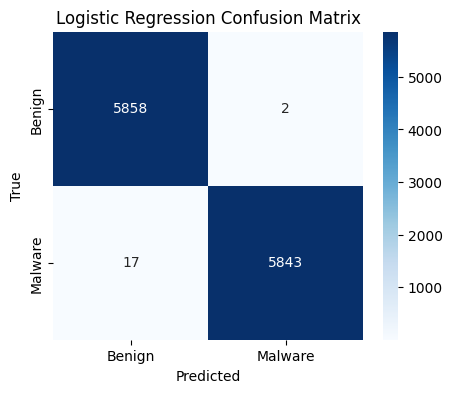


=== Random Forest ===
Train+Predict time: 1.89s
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



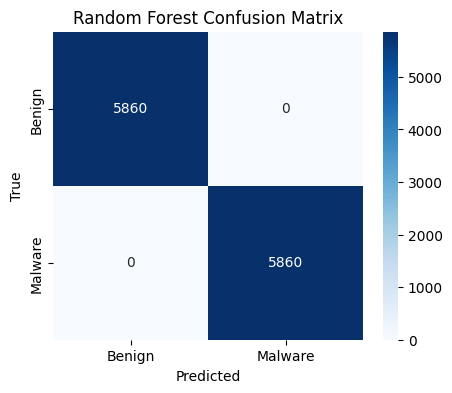


=== Decision Tree ===
Train+Predict time: 0.34s
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



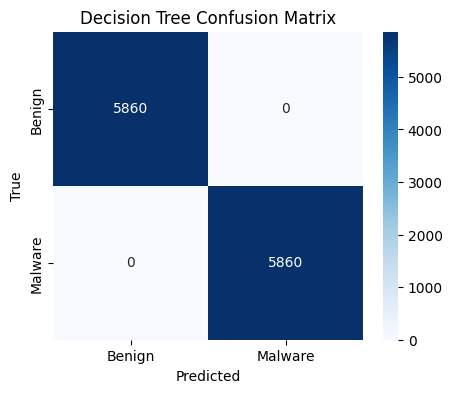


=== XGBoost ===
Train+Predict time: 0.67s
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5860
     Malware       1.00      1.00      1.00      5860

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



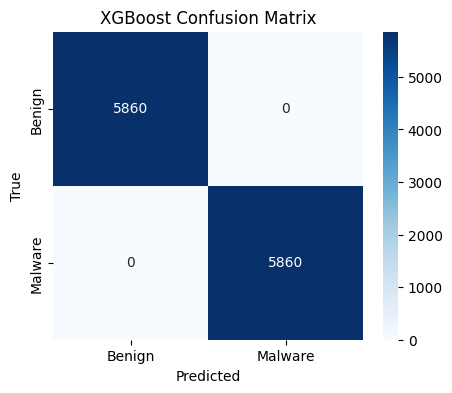

[LightGBM] [Info] Number of positive: 23438, number of negative: 23438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7639
[LightGBM] [Info] Number of data points in the train set: 46876, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

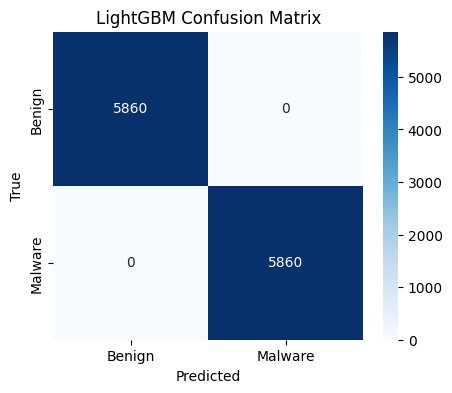

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Binary classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
    'Random Forest':       RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'Decision Tree':       DecisionTreeClassifier(random_state=42),
    'XGBoost':             XGBClassifier(eval_metric='logloss', n_jobs=-1, random_state=42),
    'LightGBM':            LGBMClassifier(n_jobs=-1, random_state=42)
}

def evaluate_holdout(models, X_tr, X_te, y_tr, y_te):
    for name, clf in models.items():
        t0 = time.time()
        clf.fit(X_tr, y_tr)
        preds = clf.predict(X_te)
        dt = time.time() - t0

        print(f"\n=== {name} ===")
        print(f"Train+Predict time: {dt:.2f}s")
        print(classification_report(y_te, preds, target_names=['Benign','Malware']))

        cm = confusion_matrix(y_te, preds)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Benign','Malware'], yticklabels=['Benign','Malware'])
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

evaluate_holdout(models, X_train, X_test, y_train, y_test)

In [14]:
scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

for name, clf in models.items():
    # Building a little pipeline that scales then classifies
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf',     clf)
    ])

    t0 = time.time()
    cv_results = cross_validate(
        pipe,
        X, y,
        cv=5,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )
    total_time = time.time() - t0

    print(f"\n=== {name} (5-Fold CV) ===")
    print(f"Total elapsed: {total_time:.2f}s")

    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        print(f"  {metric:20s}: {scores.mean():.9f} ± {scores.std():.9f}")


=== Logistic Regression (5-Fold CV) ===
Total elapsed: 3.10s
  accuracy            : 0.999982934 ± 0.000034133
  precision_weighted  : 0.999982937 ± 0.000034127
  recall_weighted     : 0.999982934 ± 0.000034133
  f1_weighted         : 0.999982934 ± 0.000034133

=== Random Forest (5-Fold CV) ===
Total elapsed: 10.11s
  accuracy            : 1.000000000 ± 0.000000000
  precision_weighted  : 1.000000000 ± 0.000000000
  recall_weighted     : 1.000000000 ± 0.000000000
  f1_weighted         : 1.000000000 ± 0.000000000

=== Decision Tree (5-Fold CV) ===
Total elapsed: 3.43s
  accuracy            : 1.000000000 ± 0.000000000
  precision_weighted  : 1.000000000 ± 0.000000000
  recall_weighted     : 1.000000000 ± 0.000000000
  f1_weighted         : 1.000000000 ± 0.000000000

=== XGBoost (5-Fold CV) ===
Total elapsed: 5.07s
  accuracy            : 1.000000000 ± 0.000000000
  precision_weighted  : 1.000000000 ± 0.000000000
  recall_weighted     : 1.000000000 ± 0.000000000
  f1_weighted         : 1

In [15]:
def feature_importance_all_xgb(df):
    mal_subtype_label_dict = {
        'Zeus': 1, 'Emotet': 2, 'Refroso': 3, 'Scar': 4, 'Reconyc': 5,
        '180Solutions': 6, 'Coolwebsearch': 7, 'Gator': 8, 'Transponder': 9,
        'TIBS': 10, 'Conti': 11, 'MAZE': 12, 'Pysa': 13, 'Ako': 14, 'Shade': 15
    }

    results = []
    xgb = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    for subtype, label in mal_subtype_label_dict.items():
        df_sub = df[df['Malware_subtype'] == label].sample(frac=1, random_state=1)
        n = int(len(df_sub) * 0.8)
        train_sub = df_sub.iloc[:n]
        rest_sub  = df_sub.iloc[n:]
        train_other = df[df['Malware_subtype'] != label]
        df_train = pd.concat([train_sub,
                              train_other.sample(n=len(train_sub), random_state=1)],
                             ignore_index=True)

        X = df_train.drop(columns=[
            'Category','pslist.nprocs64bit','handles.nport',
            'svcscan.interactive_process_services',
            'Class','Malware_type','Malware_subtype'
        ], errors='ignore').select_dtypes(include='number')
        y = df_train['Class']

        xgb.fit(X, y)
        imp = xgb.feature_importances_
        top5 = np.argsort(imp)[-5:]
        for idx in top5:
            results.append({
                'Malware_Subtype': subtype,
                'Feature':         X.columns[idx],
                'Importance':      imp[idx]
            })

    feat_df = pd.DataFrame(results)
    return feat_df.sort_values(['Malware_Subtype','Importance'], ascending=[True,False])

selected_features_df = feature_importance_all_xgb(df)
selected_features_df

,Malware_Subtype,Feature,Importance
29,180Solutions,svcscan.nservices,0.897038
28,180Solutions,handles.nevent,0.037591
27,180Solutions,ldrmodules.not_in_load,0.007342
26,180Solutions,svcscan.process_services,0.006987
25,180Solutions,ldrmodules.not_in_init,0.006201
...,...,...,...
4,Zeus,svcscan.nservices,0.886773
3,Zeus,pslist.avg_handlers,0.059536
2,Zeus,ldrmodules.not_in_load,0.008224
1,Zeus,svcscan.nactive,0.004489


In [16]:
# Calculate the frequency of each feature
feature_frequencies = selected_features_df['Feature'].value_counts()

# Convert the result to a DataFrame for better presentation
feature_frequencies_df = pd.DataFrame({'Feature': feature_frequencies.index, 'Frequency': feature_frequencies.values})

print(feature_frequencies_df)

                            Feature  Frequency
0                 svcscan.nservices         14
1               pslist.avg_handlers         10
2            ldrmodules.not_in_load          8
3      handles.avg_handles_per_proc          8
4         dlllist.avg_dlls_per_proc          8
5                    handles.nevent          4
6          svcscan.process_services          3
7        ldrmodules.not_in_load_avg          3
8           psxview.not_in_deskthrd          3
9                   handles.nmutant          2
10  svcscan.shared_process_services          2
11                 handles.nsection          2
12               handles.nsemaphore          2
13           ldrmodules.not_in_init          1
14           svcscan.kernel_drivers          1
15                 handles.nhandles          1
16       ldrmodules.not_in_init_avg          1
17             callbacks.ncallbacks          1
18                  svcscan.nactive          1


In [17]:
def feature_importance_xgb(malware_sub):
    # Mapping names→labels
    mal_sub_label = {
        'Benign': 0, 'Zeus':1, 'Emotet':2, 'Refroso':3, 'Scar':4, 'Reconyc':5,
        '180Solutions':6, 'Coolwebsearch':7, 'Gator':8, 'Transponder':9,
        'TIBS':10, 'Conti':11, 'MAZE':12, 'Pysa':13, 'Ako':14, 'Shade':15
    }[malware_sub]
    
    # Pick out 80% of that subtype
    df_sub = df[df['Malware_subtype']==mal_sub_label].sample(frac=1, random_state=1)
    n = int(0.8*len(df_sub))
    train_sub, rest_sub = df_sub.iloc[:n], df_sub.iloc[n:]
    
    # Sampling equal number of “other” rows
    other = df[df['Malware_subtype']!=mal_sub_label].sample(n=n, random_state=1)
    df_train = pd.concat([train_sub, other], ignore_index=True)

    X = df_train.drop(columns=[
        'Category','pslist.nprocs64bit','handles.nport',
        'svcscan.interactive_process_services',
        'Class','Malware_type','Malware_subtype'
    ], errors='ignore').select_dtypes('number')
    y = df_train['Class']
    
    # Fitting an XGB
    xgb = XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=6,
        use_label_encoder=False, eval_metric='logloss',
        random_state=0, n_jobs=-1
    )
    xgb.fit(X, y)
    
    # Grab top-5 importances
    imp = xgb.feature_importances_
    top5 = np.argsort(imp)[-5:]
    feats = [X.columns[i] for i in top5][::-1]
    return feats


def train_predict_novel_xgb(malware_sub, selected_features):
    mal_sub_label = {
        'Benign':0,'Zeus':1,'Emotet':2,'Refroso':3,'Scar':4,'Reconyc':5,
        '180Solutions':6,'Coolwebsearch':7,'Gator':8,'Transponder':9,
        'TIBS':10,'Conti':11,'MAZE':12,'Pysa':13,'Ako':14,'Shade':15
    }[malware_sub]
    
    # build train/test split exactly as before
    df_sub = df[df['Malware_subtype']==mal_sub_label].sample(frac=1, random_state=1)
    n = int(0.8*len(df_sub))
    train_sub, rest_sub = df_sub.iloc[:n], df_sub.iloc[n:]
    other = df[df['Malware_subtype']!=mal_sub_label]
    
    df_train = pd.concat([train_sub, 
                          other.sample(n=n, random_state=1)], ignore_index=True)
    df_raw_test = pd.concat([rest_sub, other], ignore_index=True)

    # Now balance it: pick equal numbers of benign (0) and malware (1)
    neg = df_raw_test[df_raw_test['Class'] == 0]
    pos = df_raw_test[df_raw_test['Class'] == 1]
    # make sure we don’t sample more than we have
    n = min(len(neg), len(pos))

    neg_samp = neg.sample(n=n, random_state=1)
    pos_samp = pos.sample(n=n, random_state=1)

    # final balanced test set
    df_test = pd.concat([neg_samp, pos_samp], ignore_index=True) \
                .sample(frac=1, random_state=1)  # shuffle

    X_te = df_test[selected_features]
    y_te = df_test['Class']
    
    X_tr = df_train[selected_features]
    y_tr = df_train['Class']
    
    
    # Scale
    scaler = MinMaxScaler()
    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)
    
    # Train XGB
    xgb = XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=6,
        use_label_encoder=False, eval_metric='logloss',
        random_state=0, n_jobs=-1
    )
    xgb.fit(X_tr_s, y_tr)
    
    # Predict & report
    y_pred = xgb.predict(X_te_s)
    print(f"\n=== {malware_sub} (XGB) zero-shot ===")
    print(classification_report(y_te, y_pred, target_names=['Benign','Malware']))
    acc = (y_pred == y_te).mean()
    print(f"Accuracy: {acc:.5f}")
    print(confusion_matrix(y_te, y_pred))
    
    # ——————————
    # Confusion matrix with counts + per-row percentages
    cm = confusion_matrix(y_te, y_pred)
    # Flatten in row-major: [TN, FP, FN, TP]
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten() / cm.sum()]

    # One label per cell: name \n count \n overall%
    labels = [
        f"{name}\n{count}\n{pct}"
        for name, count, pct in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2,2)

    # Plot
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt='',
        cmap='Blues',
        cbar=False,
        xticklabels=['False','True'],
        yticklabels=['False','True'],
        ax=ax
    )
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"{malware_sub} (XGB) → Unseen Test Confusion Matrix")
    plt.tight_layout()
    plt.show()
    # ——————————
    
    # Accuracy by type
    df_test['Pred'] = y_pred
    acc_by_type = df_test.groupby('Malware_type') \
                        .apply(lambda g: (g['Pred']==g['Class']).mean())
    acc_by_type.index = acc_by_type.index.map(
        {0:'Benign',1:'Trojan',2:'Spyware',3:'Ransomware'}
    )
    acc_by_type.plot.bar(figsize=(6,3), title=f"{malware_sub} → Accuracy by Malware Type")
    plt.ylabel("Accuracy"); plt.show()
    
    # Accuracy by subtype
    acc_by_sub = df_test.groupby('Malware_subtype') \
                        .apply(lambda g: (g['Pred']==g['Class']).mean())
    inv = {v:k for k,v in {
        'Benign':0,'Zeus':1,'Emotet':2,'Refroso':3,'Scar':4,'Reconyc':5,
        '180Solutions':6,'Coolwebsearch':7,'Gator':8,'Transponder':9,
        'TIBS':10,'Conti':11,'MAZE':12,'Pysa':13,'Ako':14,'Shade':15
    }.items()}
    acc_by_sub.index = acc_by_sub.index.map(inv)
    acc_by_sub.plot.bar(figsize=(10,3), title=f"{malware_sub} → Accuracy by Subtype")
    plt.ylabel("Accuracy"); plt.show()

    return

Zeus top-5: ['svcscan.nservices', 'pslist.avg_handlers', 'ldrmodules.not_in_load', 'svcscan.nactive', 'handles.avg_handles_per_proc']

=== Zeus (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27738
     Malware       1.00      1.00      1.00     27738

    accuracy                           1.00     55476
   macro avg       1.00      1.00      1.00     55476
weighted avg       1.00      1.00      1.00     55476

Accuracy: 0.99730
[[27695    43]
 [  107 27631]]


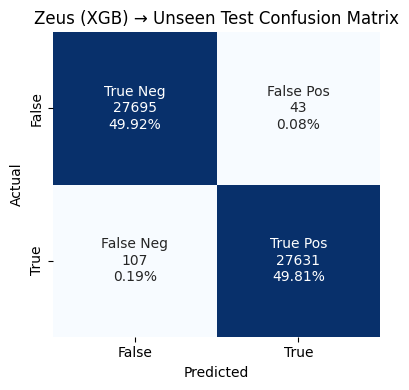

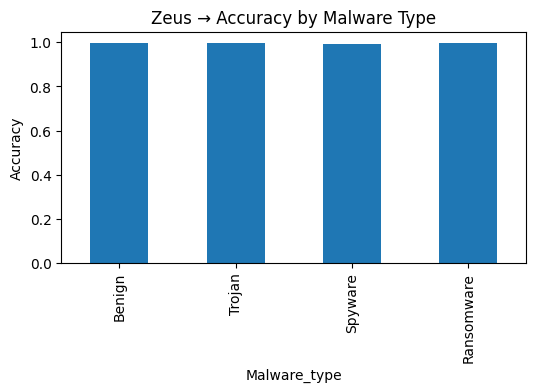

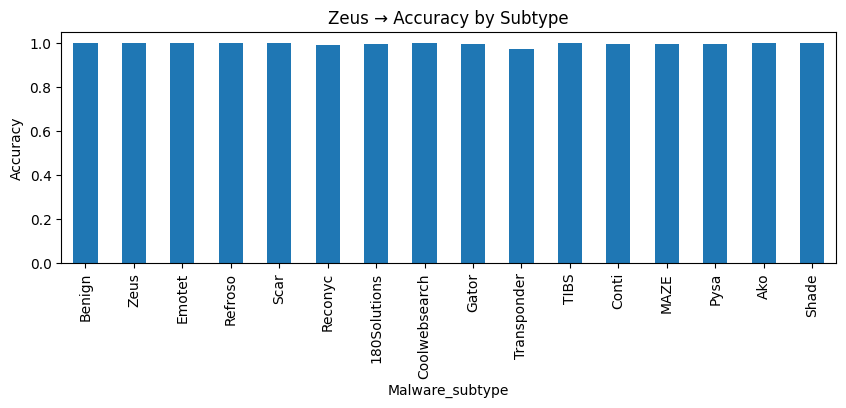

In [18]:
# Zeus
sel_feats = feature_importance_xgb('Zeus')
print("Zeus top-5:", sel_feats)
train_predict_novel_xgb('Zeus', sel_feats)

Emotet top-5: ['svcscan.nservices', 'svcscan.shared_process_services', 'pslist.avg_handlers', 'handles.nsemaphore', 'ldrmodules.not_in_load']

=== Emotet (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27725
     Malware       1.00      1.00      1.00     27725

    accuracy                           1.00     55450
   macro avg       1.00      1.00      1.00     55450
weighted avg       1.00      1.00      1.00     55450

Accuracy: 0.99692
[[27619   106]
 [   65 27660]]


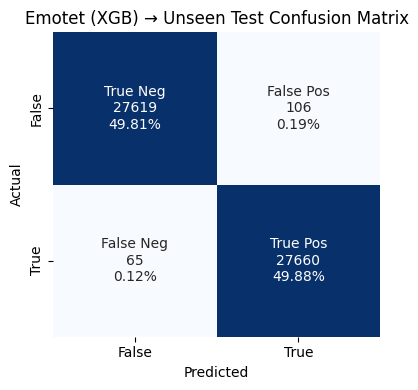

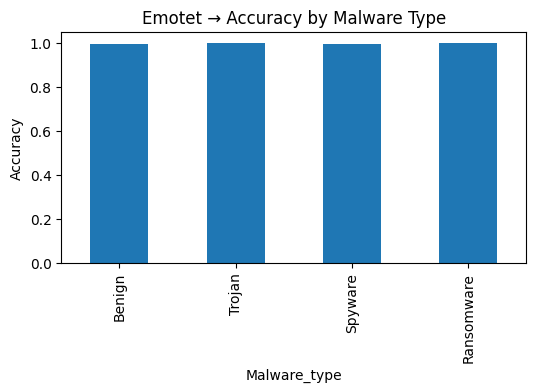

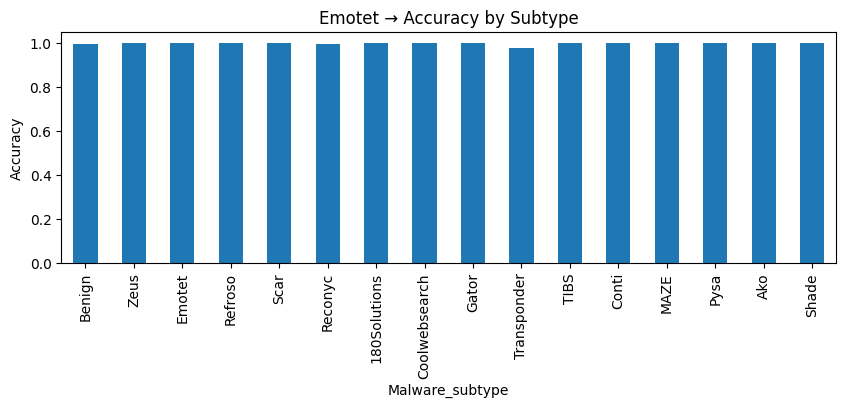

In [84]:
# Emotet
sel_feats = feature_importance_xgb('Emotet')
print("Emotet top-5:", sel_feats)
train_predict_novel_xgb('Emotet', sel_feats)

Refroso top-5: ['svcscan.nservices', 'handles.avg_handles_per_proc', 'handles.nsection', 'dlllist.avg_dlls_per_proc', 'pslist.avg_handlers']

=== Refroso (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99655
[[27586   112]
 [   79 27619]]


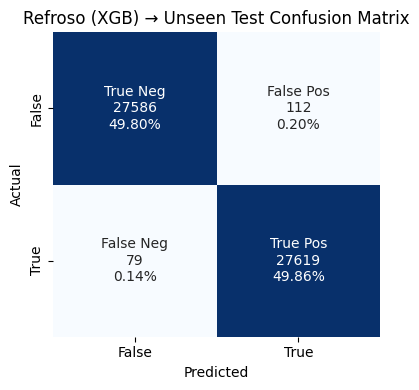

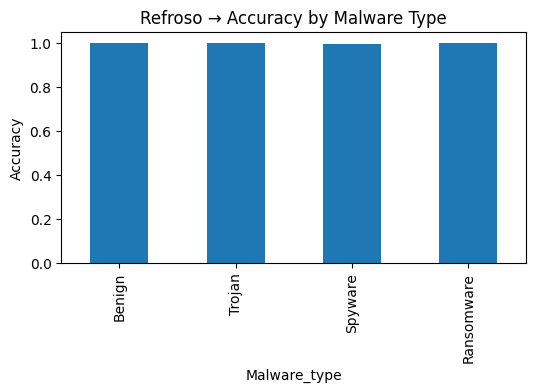

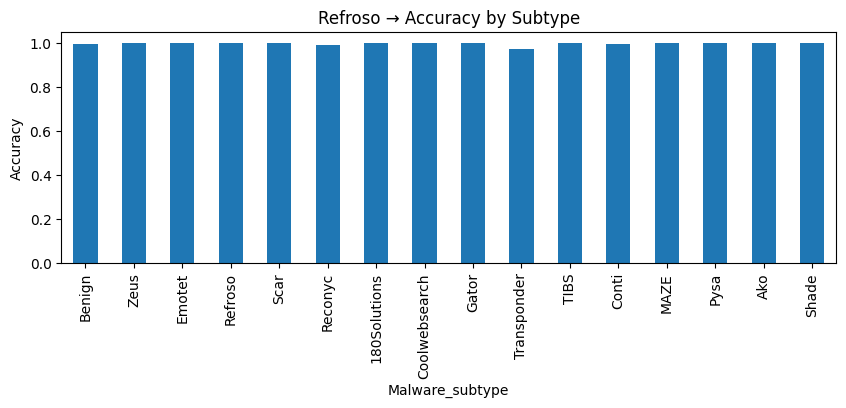

In [85]:
# Refroso
sel_feats = feature_importance_xgb('Refroso')
print("Refroso top-5:", sel_feats)
train_predict_novel_xgb('Refroso', sel_feats)

Scar top-5: ['svcscan.nservices', 'handles.nhandles', 'handles.nevent', 'handles.nsection', 'pslist.avg_handlers']

=== Scar (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99736
[[27659    39]
 [  107 27591]]


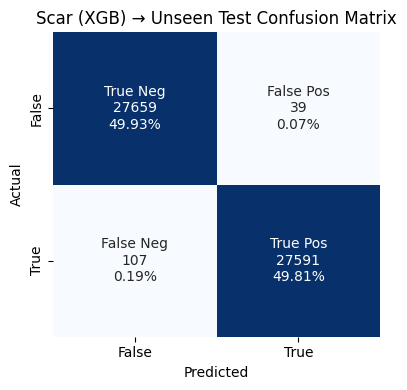

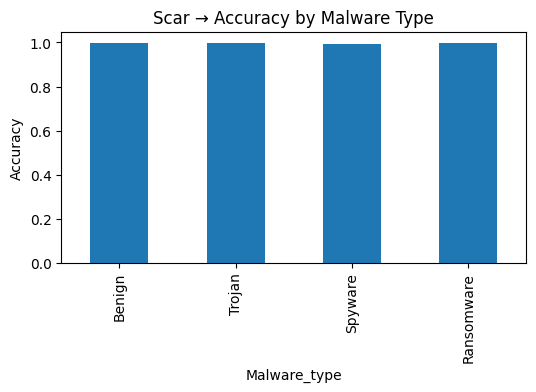

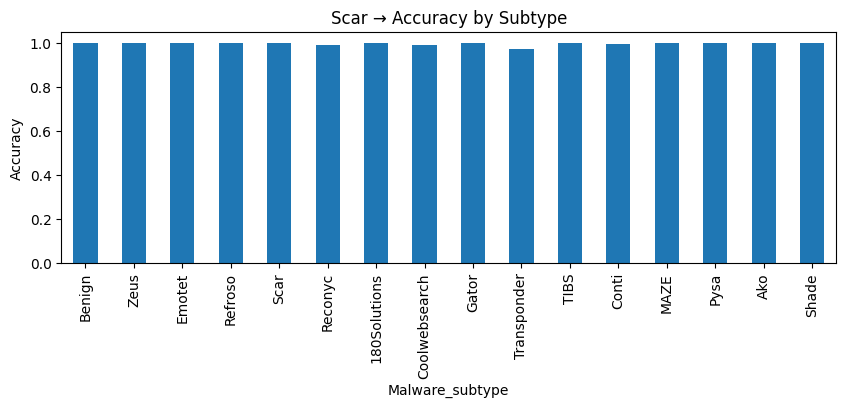

In [86]:
# Scar
sel_feats = feature_importance_xgb('Scar')
print("Scar top-5:", sel_feats)
train_predict_novel_xgb('Scar', sel_feats)

Reconyc top-5: ['svcscan.nservices', 'handles.nmutant', 'dlllist.avg_dlls_per_proc', 'handles.avg_handles_per_proc', 'pslist.avg_handlers']

=== Reconyc (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     28042
     Malware       1.00      1.00      1.00     28042

    accuracy                           1.00     56084
   macro avg       1.00      1.00      1.00     56084
weighted avg       1.00      1.00      1.00     56084

Accuracy: 0.99768
[[27930   112]
 [   18 28024]]


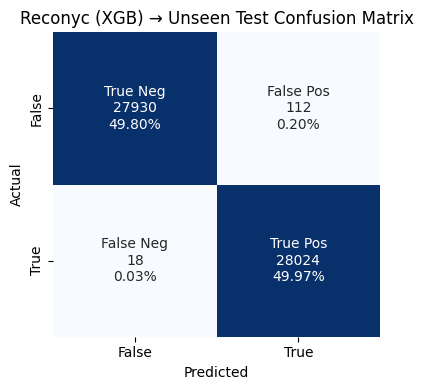

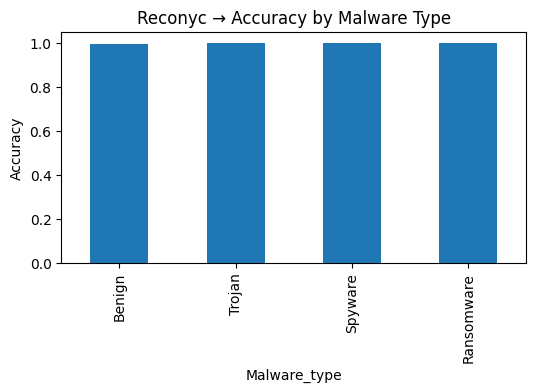

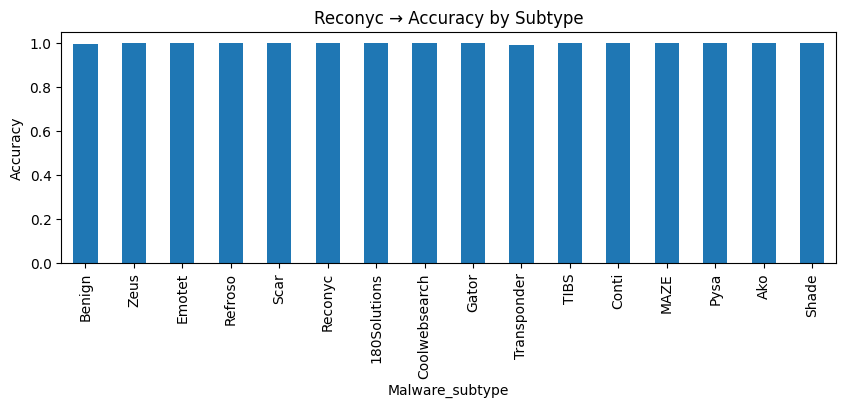

In [87]:
# Reconyc
sel_feats = feature_importance_xgb('Reconyc')
print("Reconyc top-5:", sel_feats)
train_predict_novel_xgb('Reconyc', sel_feats)

180Solutions top-5: ['svcscan.nservices', 'handles.nevent', 'ldrmodules.not_in_load', 'svcscan.process_services', 'ldrmodules.not_in_init']

=== 180Solutions (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99807
[[27619    79]
 [   28 27670]]


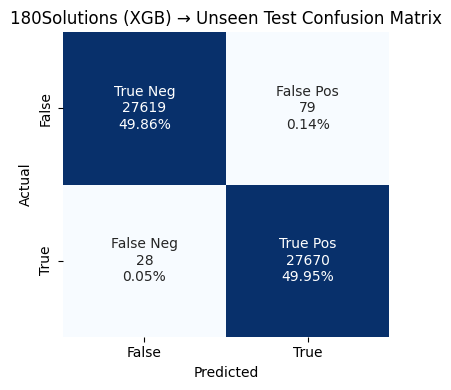

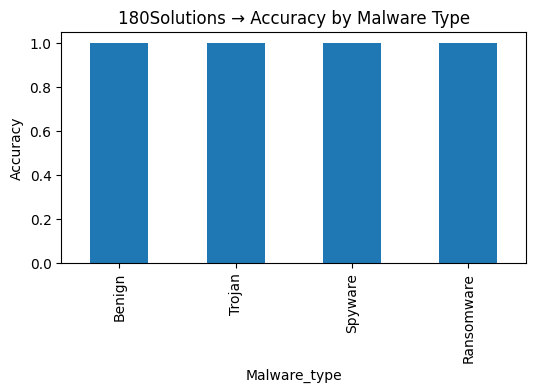

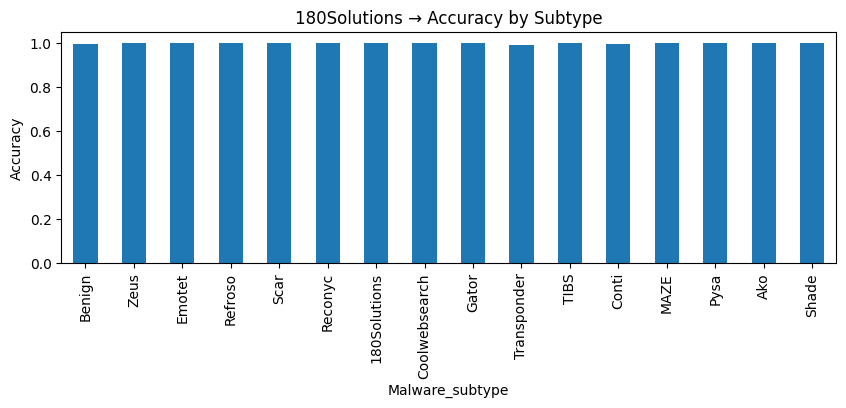

In [88]:
# 180Solutions
sel_feats = feature_importance_xgb('180Solutions')
print("180Solutions top-5:", sel_feats)
train_predict_novel_xgb('180Solutions', sel_feats)

Coolwebsearch top-5: ['svcscan.nservices', 'handles.avg_handles_per_proc', 'pslist.avg_handlers', 'dlllist.avg_dlls_per_proc', 'ldrmodules.not_in_load']

=== Coolwebsearch (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99754
[[27666    32]
 [  104 27594]]


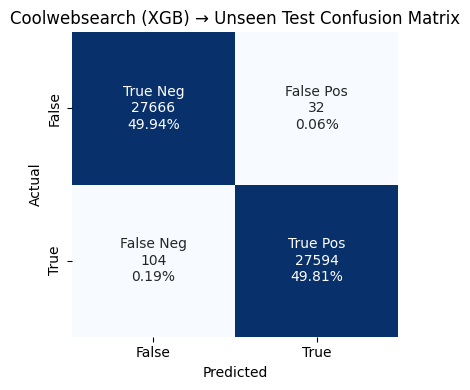

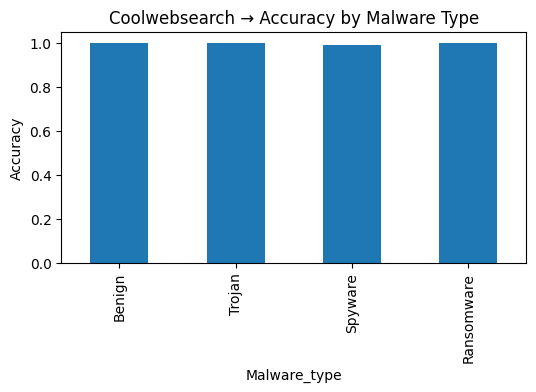

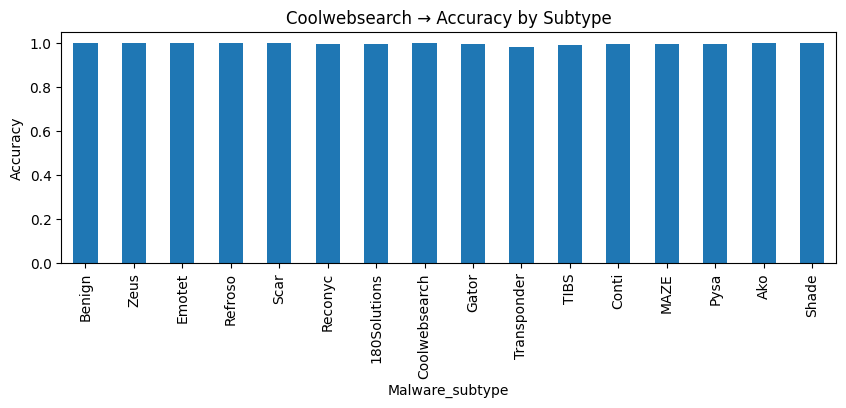

In [89]:
# Coolwebsearch
sel_feats = feature_importance_xgb('Coolwebsearch')
print("Coolwebsearch top-5:", sel_feats)
train_predict_novel_xgb('Coolwebsearch', sel_feats)

Gator top-5: ['svcscan.nservices', 'handles.avg_handles_per_proc', 'dlllist.avg_dlls_per_proc', 'psxview.not_in_deskthrd', 'ldrmodules.not_in_load']

=== Gator (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27538
     Malware       1.00      1.00      1.00     27538

    accuracy                           1.00     55076
   macro avg       1.00      1.00      1.00     55076
weighted avg       1.00      1.00      1.00     55076

Accuracy: 0.99815
[[27466    72]
 [   30 27508]]


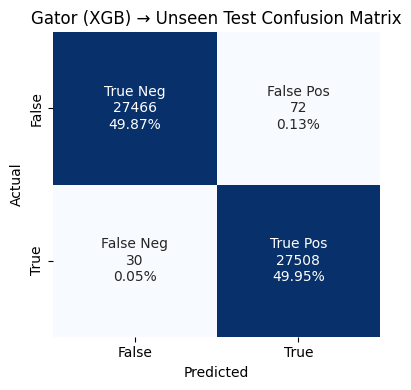

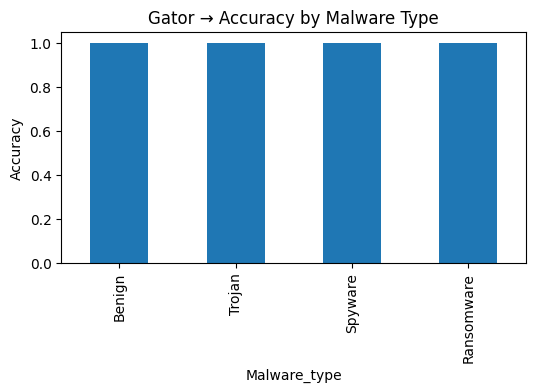

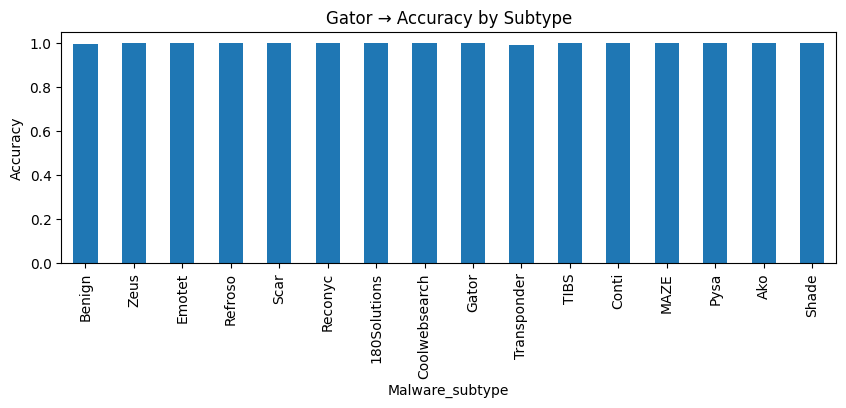

In [90]:
# Gator
sel_feats = feature_importance_xgb('Gator')
print("Gator top-5:", sel_feats)
train_predict_novel_xgb('Gator', sel_feats)

Transponder top-5: ['svcscan.nservices', 'pslist.avg_handlers', 'handles.avg_handles_per_proc', 'handles.nevent', 'callbacks.ncallbacks']

=== Transponder (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27370
     Malware       1.00      1.00      1.00     27370

    accuracy                           1.00     54740
   macro avg       1.00      1.00      1.00     54740
weighted avg       1.00      1.00      1.00     54740

Accuracy: 0.99808
[[27265   105]
 [    0 27370]]


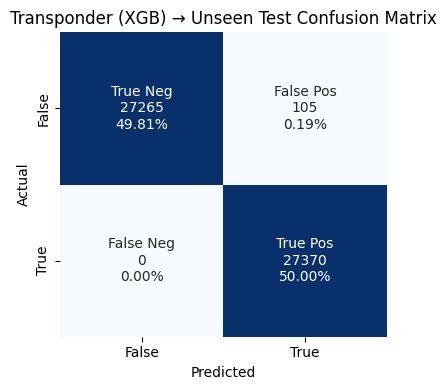

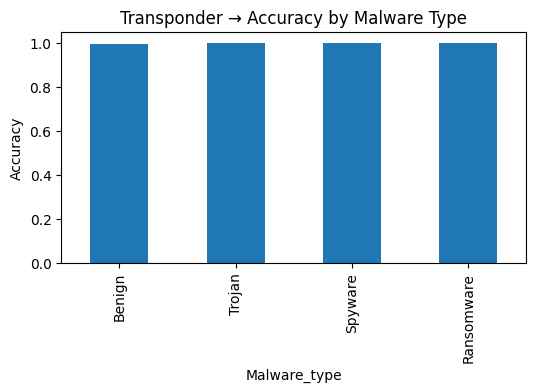

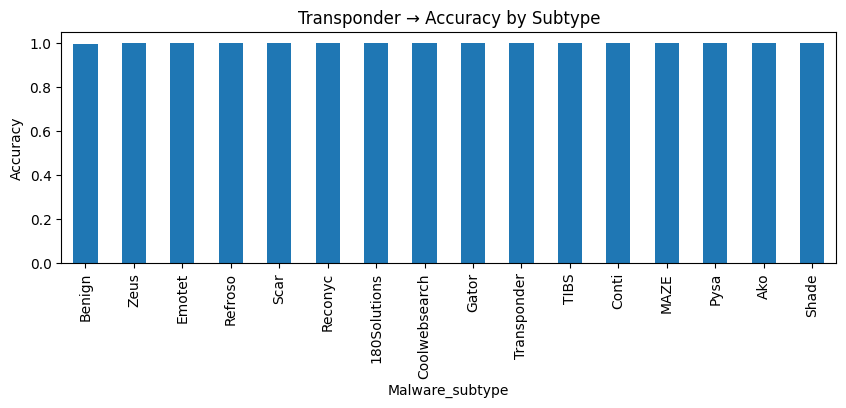

In [91]:
# Transponder
sel_feats = feature_importance_xgb('Transponder')
print("Transponder top-5:", sel_feats)
train_predict_novel_xgb('Transponder', sel_feats)

TIBS top-5: ['svcscan.nservices', 'handles.nevent', 'svcscan.process_services', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_load']

=== TIBS (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     28170
     Malware       1.00      1.00      1.00     28170

    accuracy                           1.00     56340
   macro avg       1.00      1.00      1.00     56340
weighted avg       1.00      1.00      1.00     56340

Accuracy: 0.99617
[[28029   141]
 [   75 28095]]


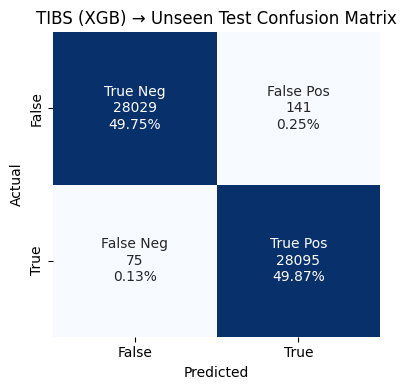

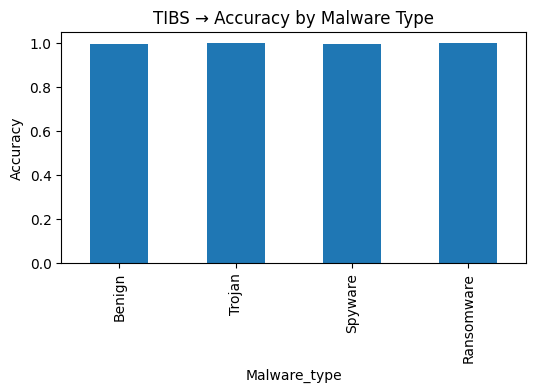

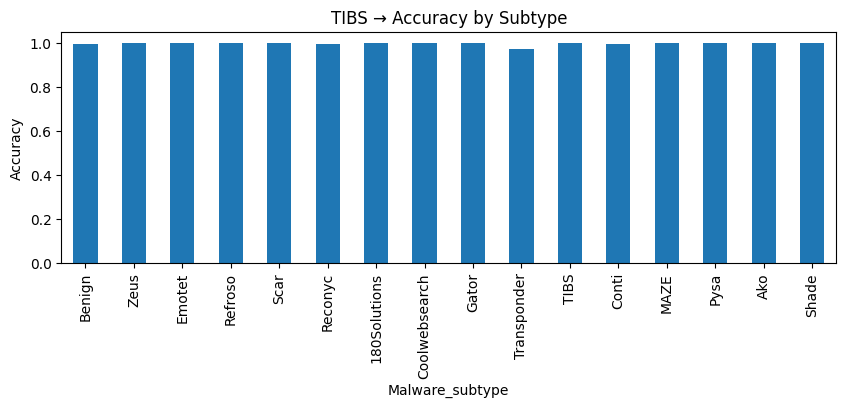

In [92]:
# TIBS
sel_feats = feature_importance_xgb('TIBS')
print("TIBS top-5:", sel_feats)
train_predict_novel_xgb('TIBS', sel_feats)

Conti top-5: ['svcscan.shared_process_services', 'handles.nmutant', 'dlllist.avg_dlls_per_proc', 'handles.avg_handles_per_proc', 'svcscan.nservices']

=== Conti (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27708
     Malware       1.00      1.00      1.00     27708

    accuracy                           1.00     55416
   macro avg       1.00      1.00      1.00     55416
weighted avg       1.00      1.00      1.00     55416

Accuracy: 0.99731
[[27620    88]
 [   61 27647]]


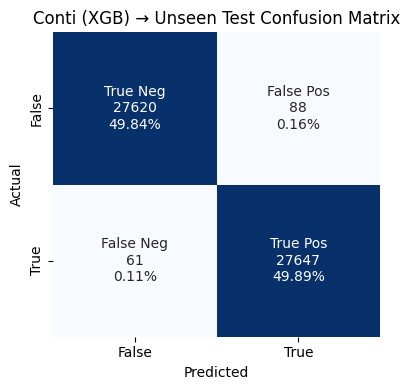

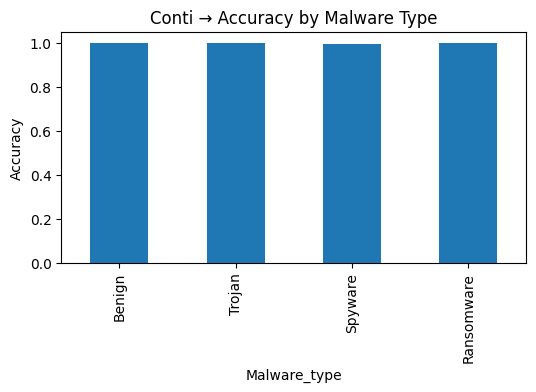

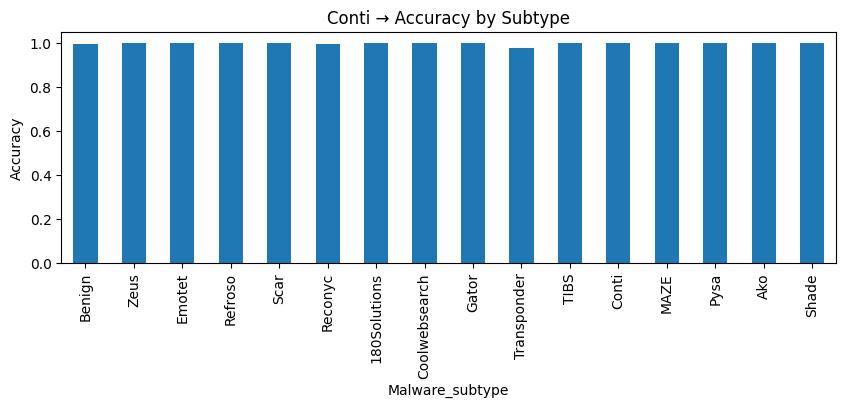

In [93]:
# Conti
sel_feats = feature_importance_xgb('Conti')
print("Conti top-5:", sel_feats)
train_predict_novel_xgb('Conti', sel_feats)

MAZE top-5: ['svcscan.nservices', 'handles.avg_handles_per_proc', 'svcscan.process_services', 'psxview.not_in_deskthrd', 'handles.nsemaphore']

=== MAZE (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27732
     Malware       1.00      1.00      1.00     27732

    accuracy                           1.00     55464
   macro avg       1.00      1.00      1.00     55464
weighted avg       1.00      1.00      1.00     55464

Accuracy: 0.99829
[[27692    40]
 [   55 27677]]


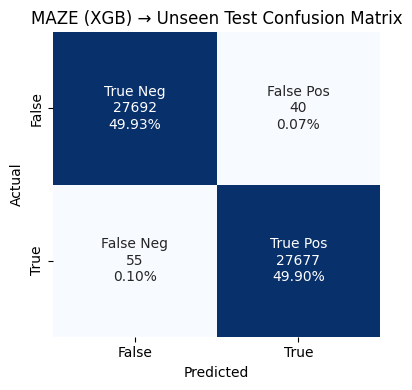

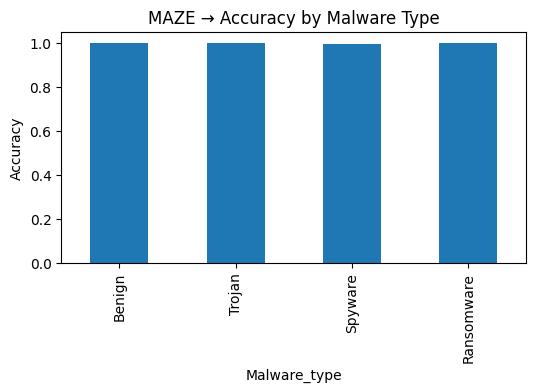

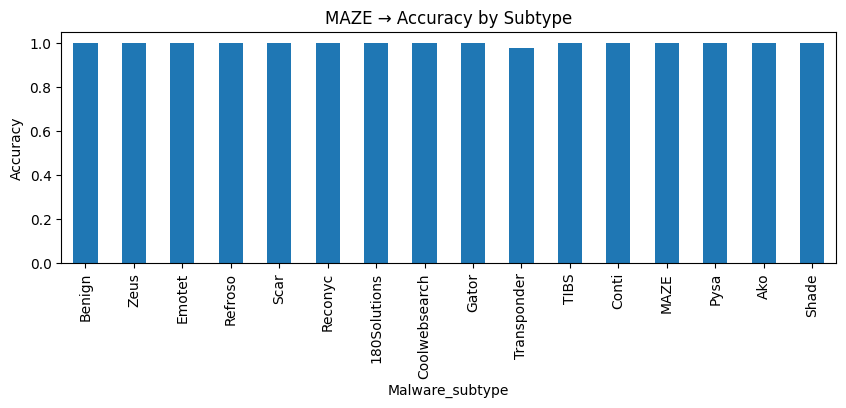

In [94]:
# MAZE
sel_feats = feature_importance_xgb('MAZE')
print("MAZE top-5:", sel_feats)
train_predict_novel_xgb('MAZE', sel_feats)

Pysa top-5: ['svcscan.kernel_drivers', 'pslist.avg_handlers', 'dlllist.avg_dlls_per_proc', 'ldrmodules.not_in_load', 'ldrmodules.not_in_load_avg']

=== Pysa (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     27925
     Malware       0.99      1.00      1.00     27925

    accuracy                           1.00     55850
   macro avg       1.00      1.00      1.00     55850
weighted avg       1.00      1.00      1.00     55850

Accuracy: 0.99561
[[27750   175]
 [   70 27855]]


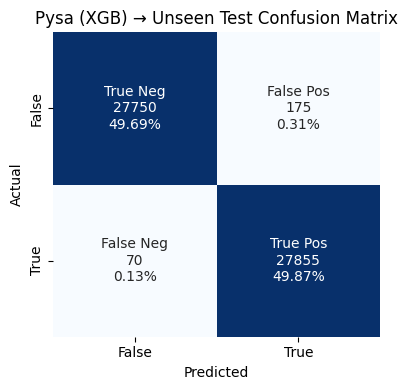

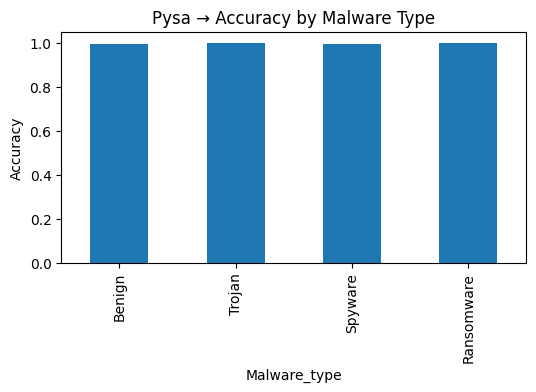

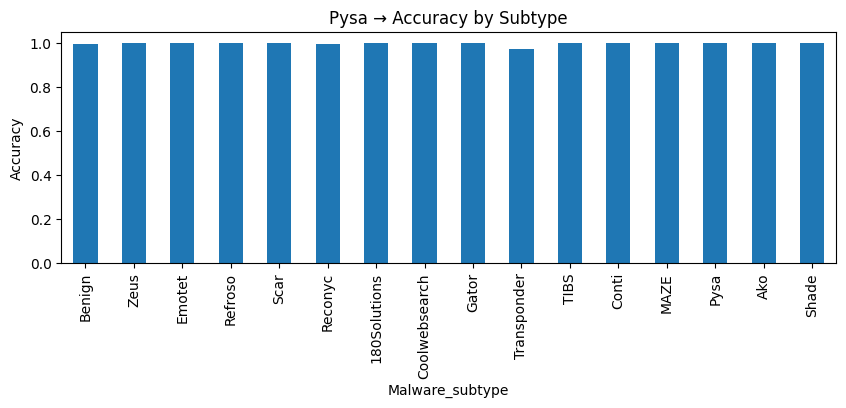

In [95]:
# Pysa
sel_feats = feature_importance_xgb('Pysa')
print("Pysa top-5:", sel_feats)
train_predict_novel_xgb('Pysa', sel_feats)

Ako top-5: ['svcscan.nservices', 'pslist.avg_handlers', 'dlllist.avg_dlls_per_proc', 'ldrmodules.not_in_load', 'ldrmodules.not_in_load_avg']

=== Ako (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     27698
     Malware       0.99      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99731
[[27554   144]
 [    5 27693]]


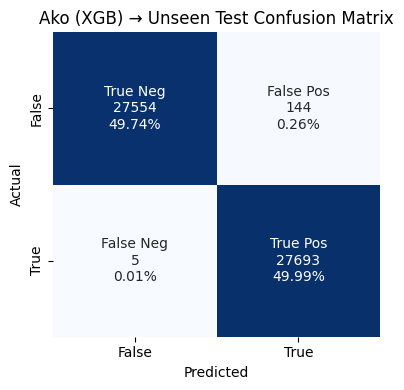

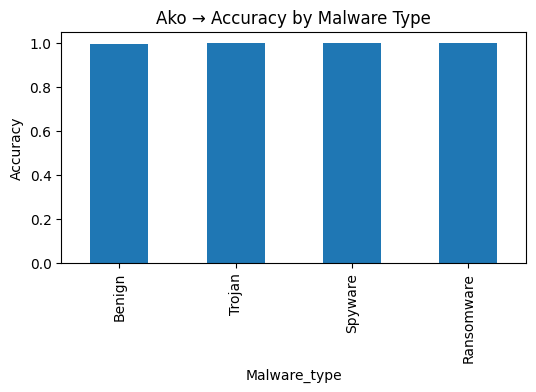

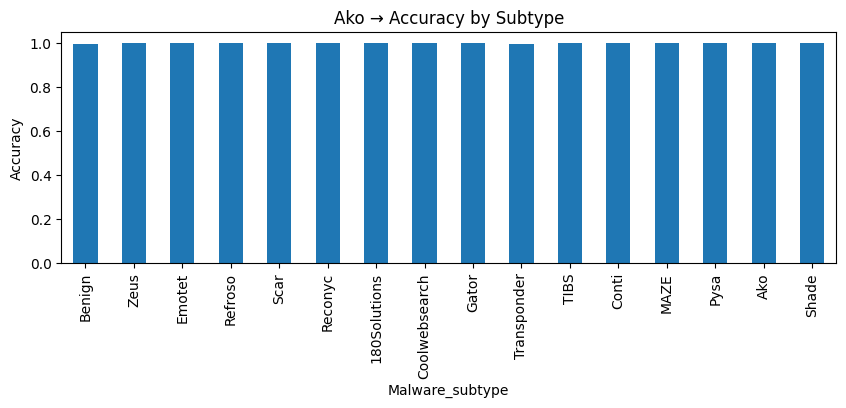

In [96]:
# Ako
sel_feats = feature_importance_xgb('Ako')
print("Ako top-5:", sel_feats)
train_predict_novel_xgb('Ako', sel_feats)

Shade top-5: ['svcscan.nservices', 'pslist.avg_handlers', 'dlllist.avg_dlls_per_proc', 'psxview.not_in_deskthrd', 'ldrmodules.not_in_load_avg']

=== Shade (XGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27596
     Malware       1.00      1.00      1.00     27596

    accuracy                           1.00     55192
   macro avg       1.00      1.00      1.00     55192
weighted avg       1.00      1.00      1.00     55192

Accuracy: 0.99859
[[27561    35]
 [   43 27553]]


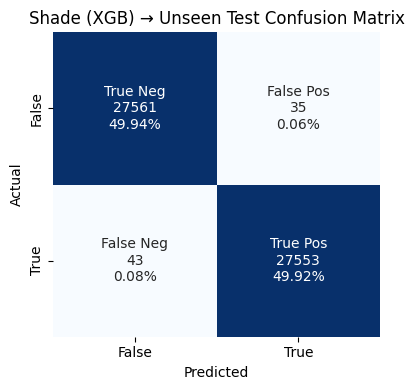

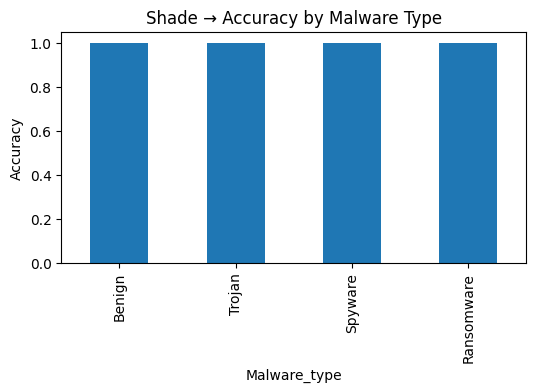

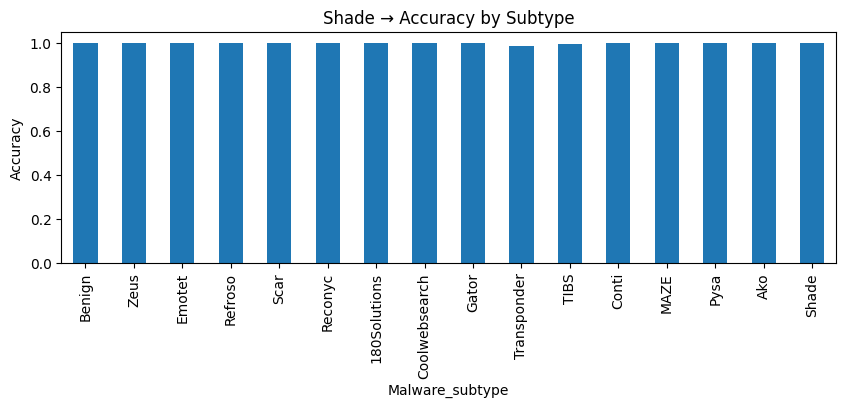

In [97]:
# Shade
sel_feats = feature_importance_xgb('Shade')
print("Shade top-5:", sel_feats)
train_predict_novel_xgb('Shade', sel_feats)

In [35]:
def feature_importance_lgb(malware_sub):
    # 1) same mapping & train split as before
    mal_sub_label = {
        'Benign': 0, 'Zeus':1, 'Emotet':2, 'Refroso':3, 'Scar':4, 'Reconyc':5,
        '180Solutions':6, 'Coolwebsearch':7, 'Gator':8, 'Transponder':9,
        'TIBS':10, 'Conti':11, 'MAZE':12, 'Pysa':13, 'Ako':14, 'Shade':15
    }[malware_sub]
    
    df_sub = df[df['Malware_subtype']==mal_sub_label].sample(frac=1, random_state=1)
    n = int(0.8 * len(df_sub))
    train_sub = df_sub.iloc[:n]
    other    = df[df['Malware_subtype']!=mal_sub_label].sample(n=n, random_state=1)
    df_train = pd.concat([train_sub, other], ignore_index=True)

    # 2) pick out numeric features & labels
    X = df_train.drop(columns=[
        'Category','pslist.nprocs64bit','handles.nport',
        'svcscan.interactive_process_services',
        'Class','Malware_type','Malware_subtype'
    ], errors='ignore').select_dtypes('number')
    y = df_train['Class']

    # 3) fit a LightGBM
    lgb = LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=0,
        n_jobs=-1
    )
    lgb.fit(X, y)

    # 4) grab top-5 importances
    imp = lgb.feature_importances_
    top5 = np.argsort(imp)[-5:]
    return [X.columns[i] for i in top5][::-1]


def train_predict_novel_lgb(malware_sub, selected_features):
    # 1) Keep the mapping dict around
    mal_subtype_label_dict = {
        'Benign':0,'Zeus':1,'Emotet':2,'Refroso':3,'Scar':4,'Reconyc':5,
        '180Solutions':6,'Coolwebsearch':7,'Gator':8,'Transponder':9,
        'TIBS':10,'Conti':11,'MAZE':12,'Pysa':13,'Ako':14,'Shade':15
    }
    # 2) Pull out the integer label
    mal_sub_label = mal_subtype_label_dict[malware_sub]

    # … your existing train/test split & balancing …
    df_sub      = df[df['Malware_subtype']==mal_sub_label].sample(frac=1, random_state=1)
    n_sub       = int(0.8 * len(df_sub))
    train_sub   = df_sub.iloc[:n_sub]
    rest_sub    = df_sub.iloc[n_sub:]
    other_all   = df[df['Malware_subtype']!=mal_sub_label]

    df_train    = pd.concat([train_sub, other_all.sample(n=n_sub, random_state=1)], ignore_index=True)
    df_raw_test = pd.concat([rest_sub, other_all], ignore_index=True)

    neg = df_raw_test[df_raw_test['Class']==0]
    pos = df_raw_test[df_raw_test['Class']==1]
    n_bal = min(len(neg), len(pos))
    df_test = pd.concat([
        neg.sample(n=n_bal, random_state=1),
        pos.sample(n=n_bal, random_state=1)
    ], ignore_index=True).sample(frac=1, random_state=1)

    X_tr, y_tr = df_train[selected_features], df_train['Class']
    X_te, y_te = df_test[selected_features], df_test['Class']

    # Scale
    scaler  = MinMaxScaler()
    X_tr_s   = scaler.fit_transform(X_tr)
    X_te_s   = scaler.transform(X_te)

    # Train
    lgb = LGBMClassifier(
        n_estimators=100, learning_rate=0.1,
        max_depth=6, random_state=0, n_jobs=-1,
        verbose=-1, verbosity=-1
    )
    lgb.fit(X_tr_s, y_tr)

    # Predict & print metrics
    y_pred = lgb.predict(X_te_s)
    print(f"\n=== {malware_sub} (LGB) zero-shot ===")
    print(classification_report(y_te, y_pred, target_names=['Benign','Malware']))
    acc = (y_pred == y_te).mean()
    print(f"Accuracy: {acc:.5f}")
    print(confusion_matrix(y_te, y_pred))

    # Plot confusion matrix (balanced)
    cm = confusion_matrix(y_te, y_pred)
    names  = ['True Neg','False Pos','False Neg','True Pos']
    counts = [f"{v}" for v in cm.flatten()]
    pct    = [f"{v:.2%}" for v in cm.flatten()/cm.sum()]
    labels = np.asarray([f"{n}\n{c}\n{p}"
                         for n,c,p in zip(names,counts,pct)]).reshape(2,2)

    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(
        cm, annot=labels, fmt='', cmap='Blues', cbar=False,
        xticklabels=['False','True'], yticklabels=['False','True'], ax=ax
    )
    ax.set(title=f"{malware_sub} (LGB) → Balanced Test CM",
           xlabel="Predicted", ylabel="Actual")
    plt.tight_layout()
    plt.show()

    # Accuracy by type
    df_test['Pred'] = y_pred
    acc_by_type = df_test.groupby('Malware_type')['Pred'] \
                         .apply(lambda s: (s==df_test.loc[s.index,'Class']).mean())
    acc_by_type.index = {0:'Benign',1:'Trojan',2:'Spyware',3:'Ransomware'}
    acc_by_type.plot.bar(title=f"{malware_sub} → Accuracy by Malware Type")
    plt.show()

    # Accuracy by subtype
    acc_by_sub = df_test.groupby('Malware_subtype')['Pred'] \
                        .apply(lambda s: (s==df_test.loc[s.index,'Class']).mean())

    # **Here** use the dict to invert
    inv_map = {v:k for k,v in mal_subtype_label_dict.items()}
    acc_by_sub.index = acc_by_sub.index.map(inv_map)

    acc_by_sub.plot.bar(figsize=(10,3),
                        title=f"{malware_sub} → Accuracy by Subtype")
    plt.ylabel("Accuracy")
    plt.show()

    return acc_by_type, acc_by_sub


=== Zeus (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27738
     Malware       1.00      1.00      1.00     27738

    accuracy                           1.00     55476
   macro avg       1.00      1.00      1.00     55476
weighted avg       1.00      1.00      1.00     55476

Accuracy: 0.99847


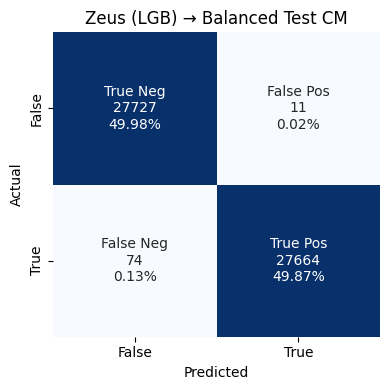

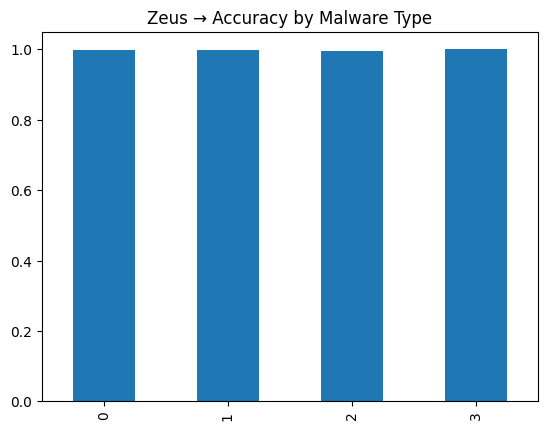

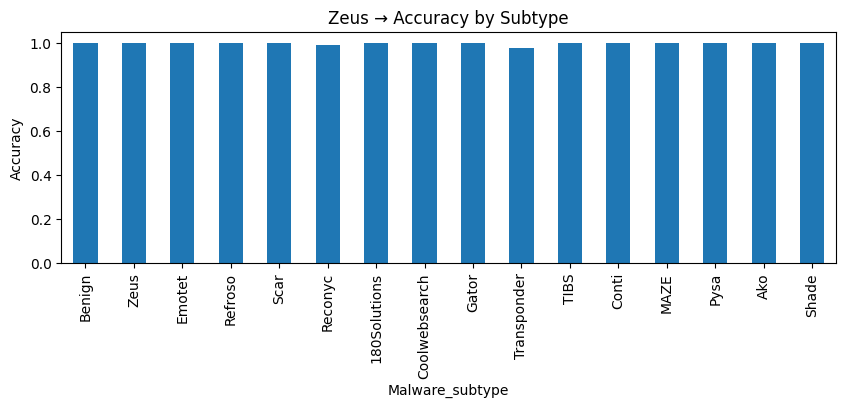

(0    0.999603
 1    0.998234
 2    0.994112
 3    0.999898
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.999603
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.991083
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.975519
 TIBS             1.000000
 Conti            0.999497
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [36]:
feats = feature_importance_lgb("Zeus")
train_predict_novel_lgb("Zeus", feats)


=== Emotet (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27725
     Malware       1.00      1.00      1.00     27725

    accuracy                           1.00     55450
   macro avg       1.00      1.00      1.00     55450
weighted avg       1.00      1.00      1.00     55450

Accuracy: 0.99870


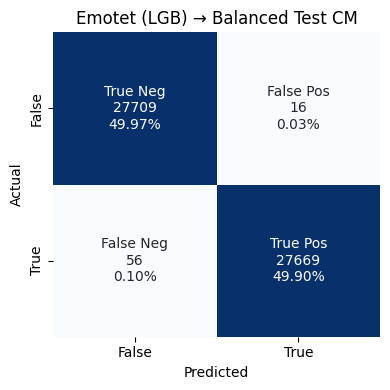

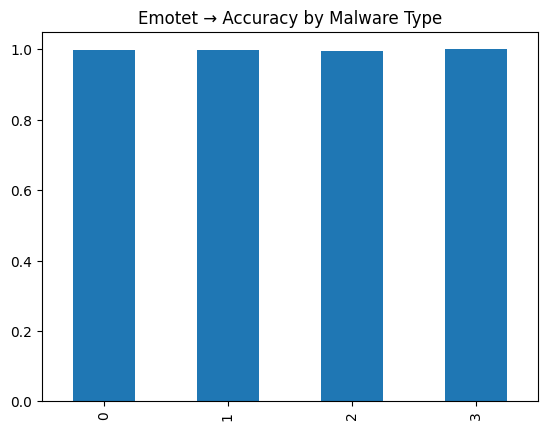

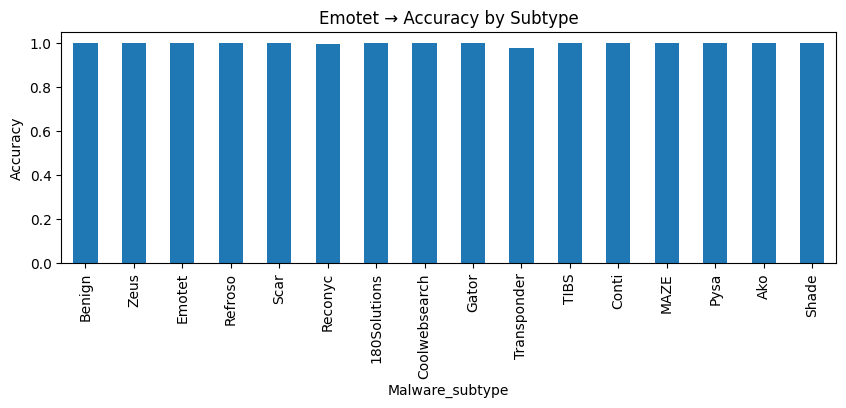

(0    0.999423
 1    0.999368
 2    0.995010
 3    0.999898
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.999423
 Zeus             1.000000
 Emotet           1.000000
 Refroso          0.999500
 Scar             1.000000
 Reconyc          0.997452
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.979253
 TIBS             1.000000
 Conti            0.999497
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [37]:
feats = feature_importance_lgb("Emotet")
train_predict_novel_lgb("Emotet", feats)


=== Refroso (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99782


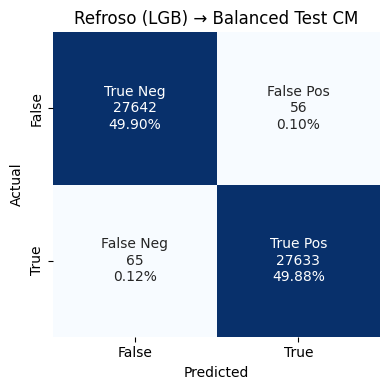

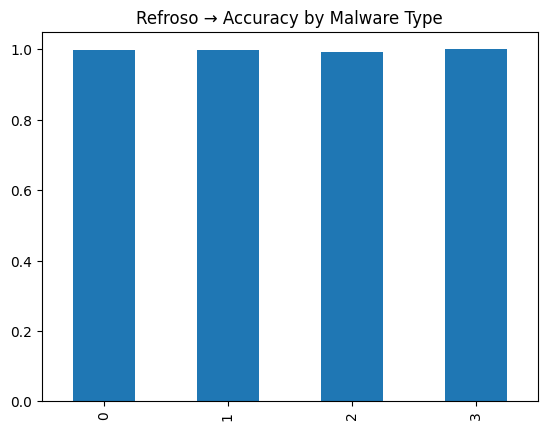

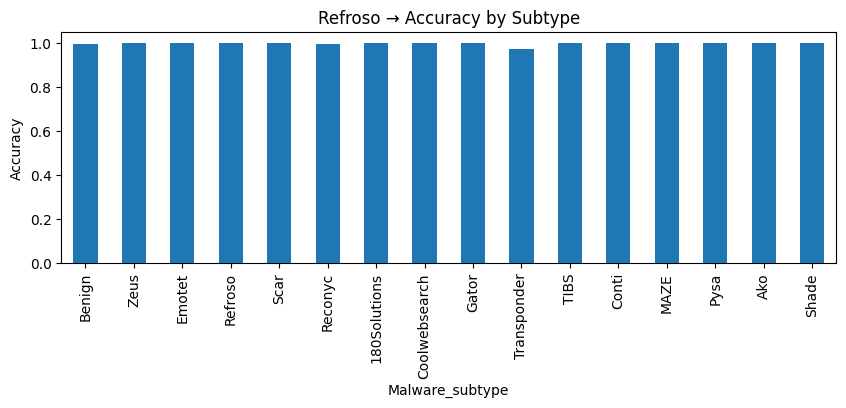

(0    0.997978
 1    0.999366
 2    0.994012
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.997978
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.996815
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.975104
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [38]:
feats = feature_importance_lgb("Refroso")
train_predict_novel_lgb("Refroso", feats)


=== Scar (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99827


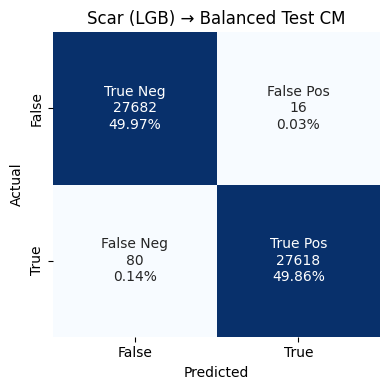

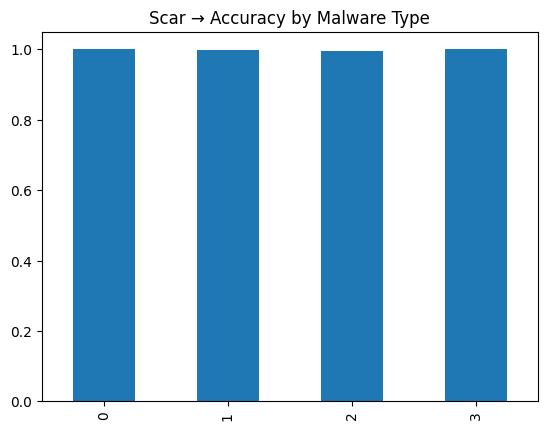

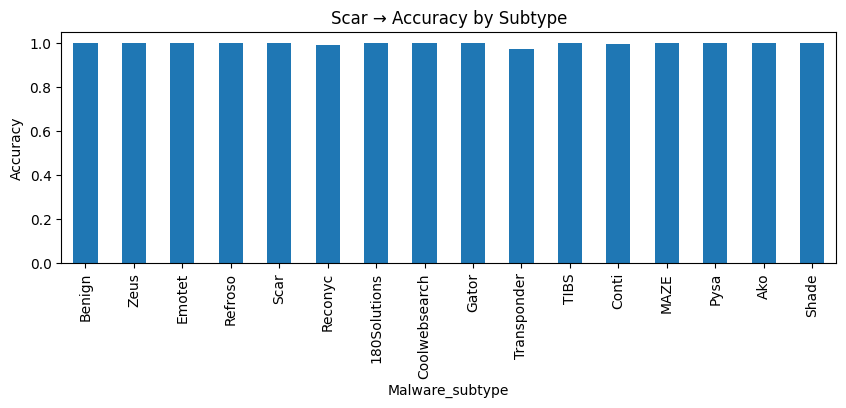

(0    0.999422
 1    0.998225
 2    0.994012
 3    0.999387
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.999422
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.991083
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.975104
 TIBS             1.000000
 Conti            0.996982
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [39]:
feats = feature_importance_lgb("Scar")
train_predict_novel_lgb("Scar", feats)


=== Reconyc (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     28042
     Malware       0.99      1.00      1.00     28042

    accuracy                           1.00     56084
   macro avg       1.00      1.00      1.00     56084
weighted avg       1.00      1.00      1.00     56084

Accuracy: 0.99558


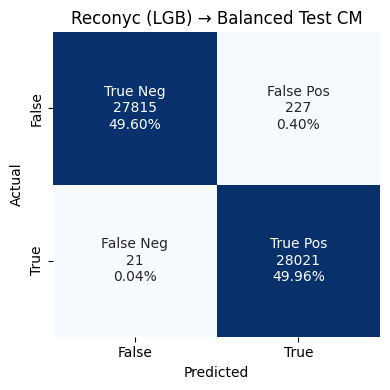

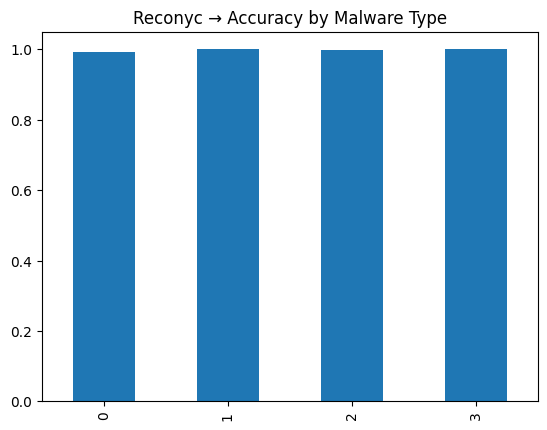

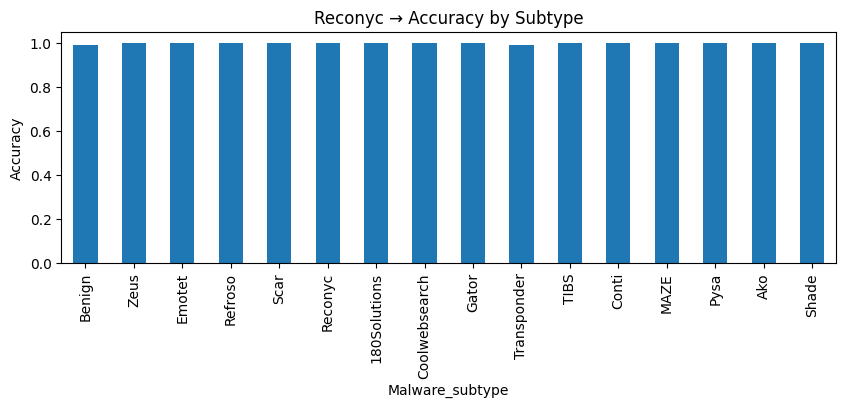

(0    0.991905
 1    1.000000
 2    0.998004
 3    0.999898
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.991905
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          1.000000
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.991701
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            0.999530
 Name: Pred, dtype: float64)

In [40]:
feats = feature_importance_lgb("Reconyc")
train_predict_novel_lgb("Reconyc", feats)


=== 180Solutions (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99825


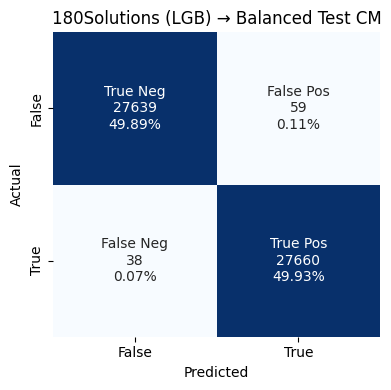

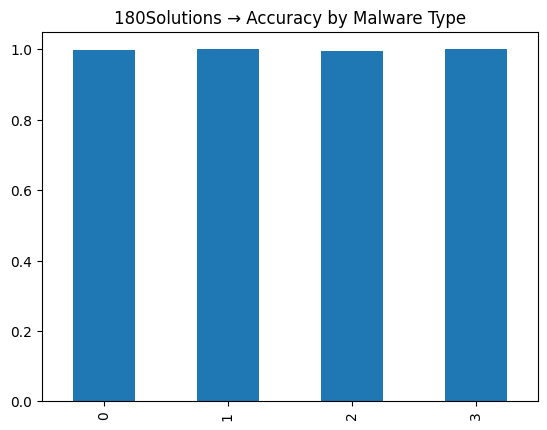

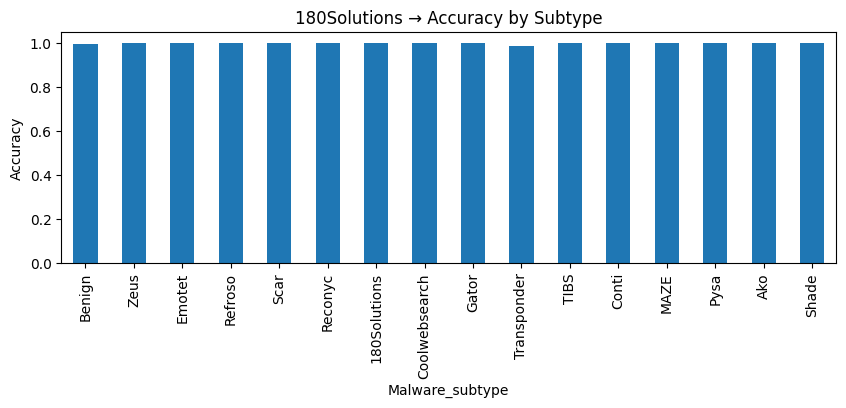

(0    0.997870
 1    0.999895
 2    0.995606
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.997870
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.999363
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.984647
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [41]:
feats = feature_importance_lgb("180Solutions")
train_predict_novel_lgb("180Solutions", feats)


=== Coolwebsearch (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27698
     Malware       1.00      1.00      1.00     27698

    accuracy                           1.00     55396
   macro avg       1.00      1.00      1.00     55396
weighted avg       1.00      1.00      1.00     55396

Accuracy: 0.99884


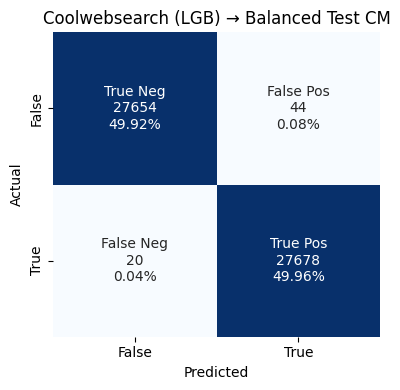

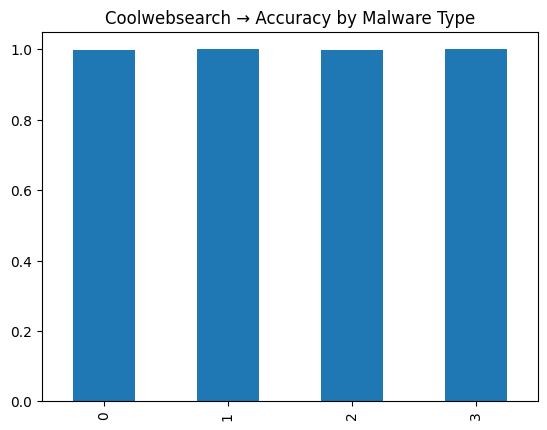

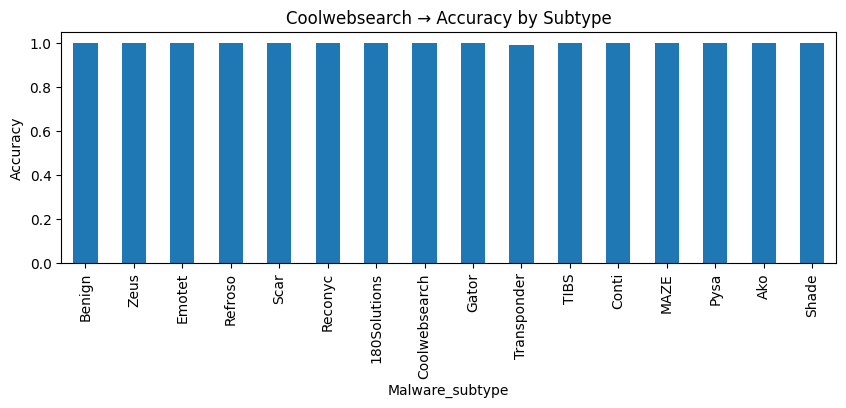

(0    0.998411
 1    1.000000
 2    0.997625
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.998411
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          1.000000
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.991701
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [42]:
feats = feature_importance_lgb("Coolwebsearch")
train_predict_novel_lgb("Coolwebsearch", feats)


=== Gator (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27538
     Malware       1.00      1.00      1.00     27538

    accuracy                           1.00     55076
   macro avg       1.00      1.00      1.00     55076
weighted avg       1.00      1.00      1.00     55076

Accuracy: 0.99880


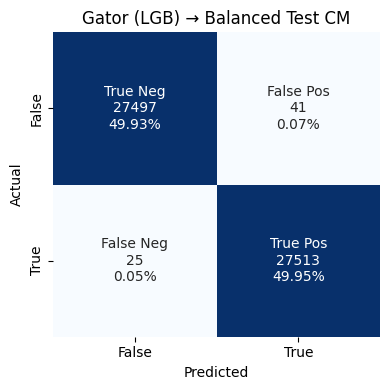

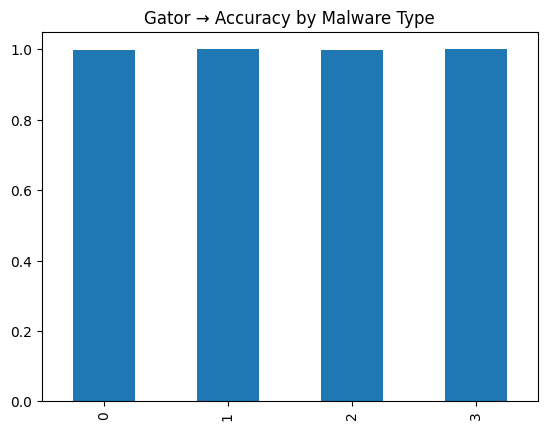

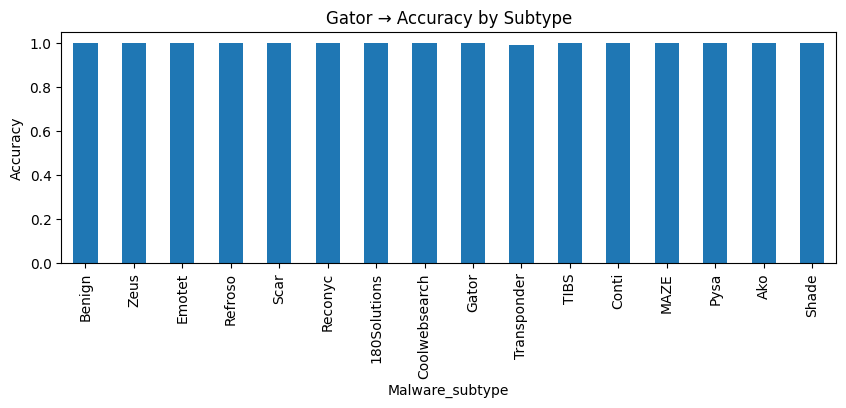

(0    0.998511
 1    1.000000
 2    0.996973
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.998511
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          1.000000
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.989627
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [43]:
feats = feature_importance_lgb("Gator")
train_predict_novel_lgb("Gator", feats)


=== Transponder (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27370
     Malware       1.00      1.00      1.00     27370

    accuracy                           1.00     54740
   macro avg       1.00      1.00      1.00     54740
weighted avg       1.00      1.00      1.00     54740

Accuracy: 0.99755


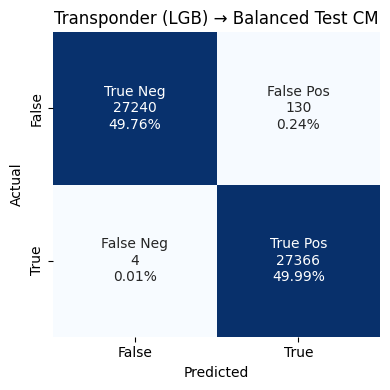

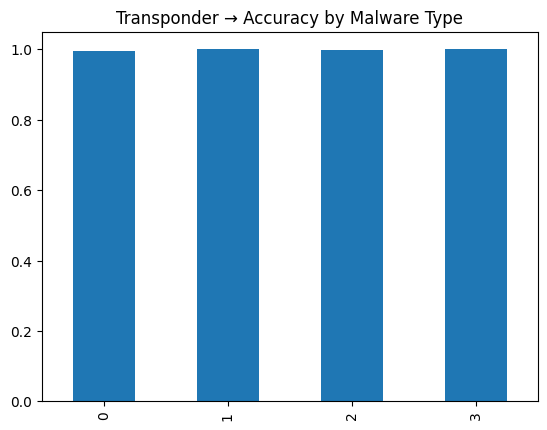

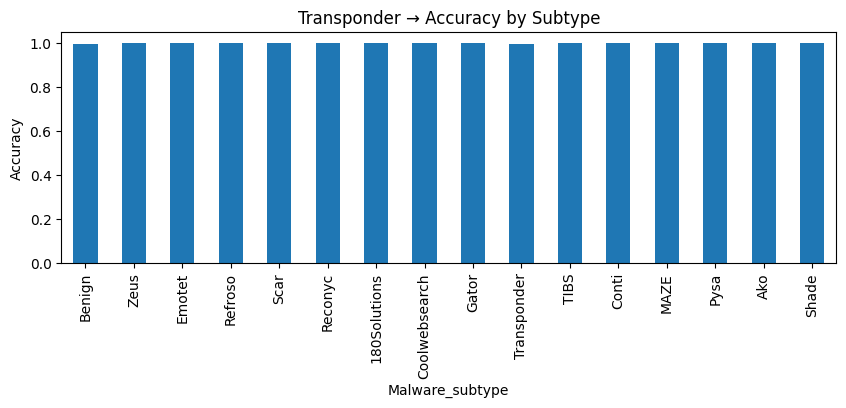

(0    0.995250
 1    0.999895
 2    0.999629
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.995250
 Zeus             1.000000
 Emotet           0.999492
 Refroso          1.000000
 Scar             1.000000
 Reconyc          1.000000
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.993776
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [44]:
feats = feature_importance_lgb("Transponder")
train_predict_novel_lgb("Transponder", feats)


=== TIBS (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     28170
     Malware       0.99      1.00      1.00     28170

    accuracy                           1.00     56340
   macro avg       1.00      1.00      1.00     56340
weighted avg       1.00      1.00      1.00     56340

Accuracy: 0.99592


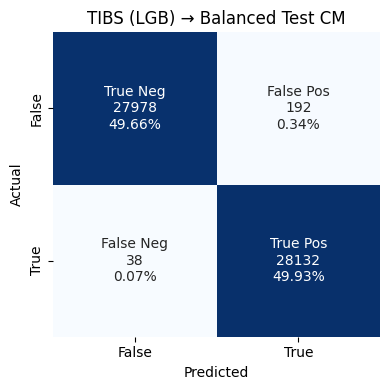

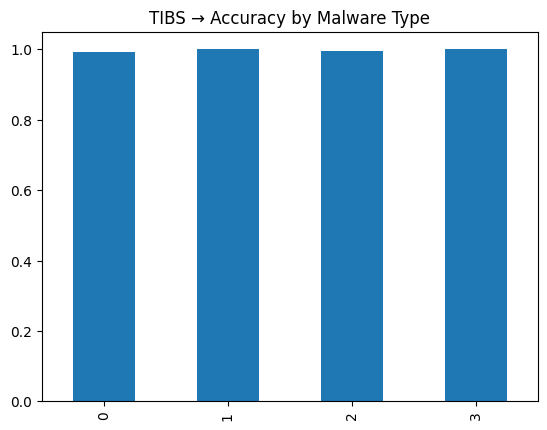

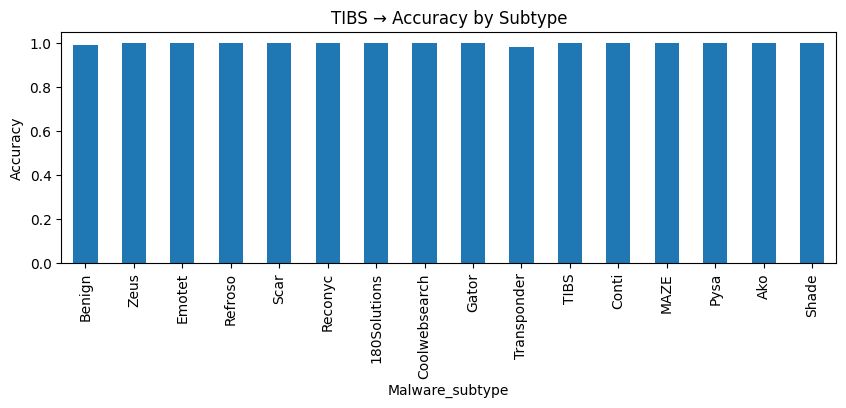

(0    0.993184
 1    1.000000
 2    0.995726
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.993184
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          1.000000
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.984232
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [45]:
feats = feature_importance_lgb("TIBS")
train_predict_novel_lgb("TIBS", feats)


=== Conti (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27708
     Malware       1.00      1.00      1.00     27708

    accuracy                           1.00     55416
   macro avg       1.00      1.00      1.00     55416
weighted avg       1.00      1.00      1.00     55416

Accuracy: 0.99778


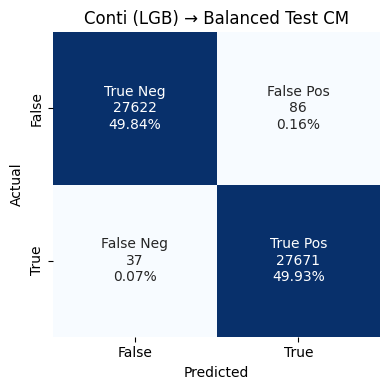

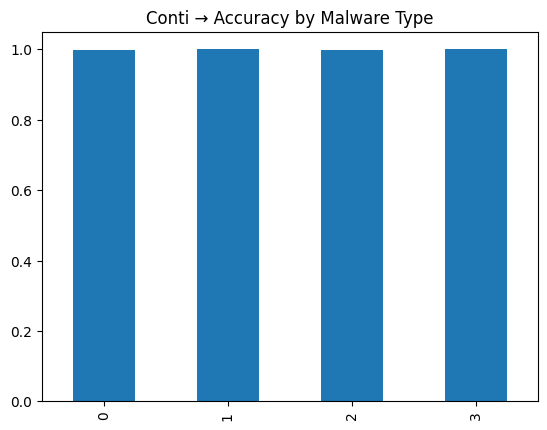

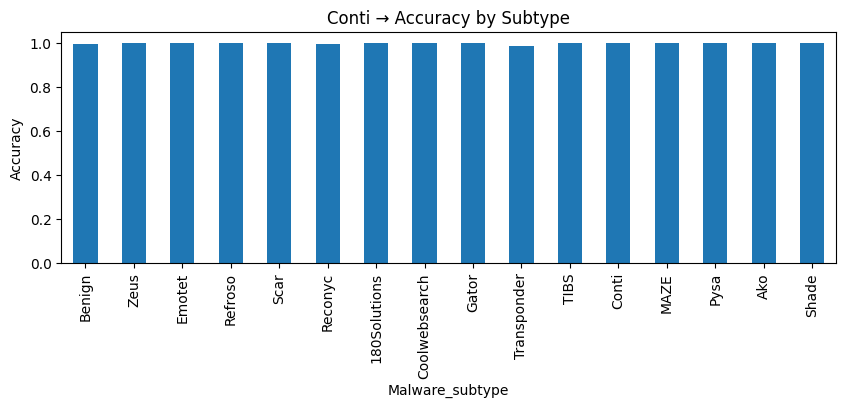

(0    0.996896
 1    0.999684
 2    0.996806
 3    0.999756
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.996896
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.998089
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.986722
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             0.999418
 Ako              1.000000
 Shade            0.999530
 Name: Pred, dtype: float64)

In [46]:
feats = feature_importance_lgb("Conti")
train_predict_novel_lgb("Conti", feats)


=== MAZE (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27732
     Malware       1.00      1.00      1.00     27732

    accuracy                           1.00     55464
   macro avg       1.00      1.00      1.00     55464
weighted avg       1.00      1.00      1.00     55464

Accuracy: 0.99800


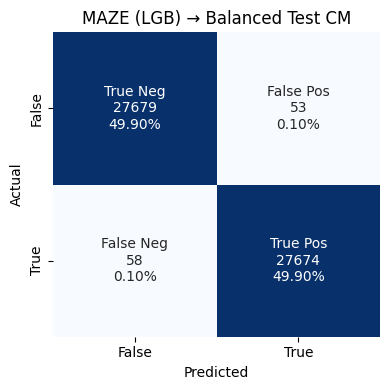

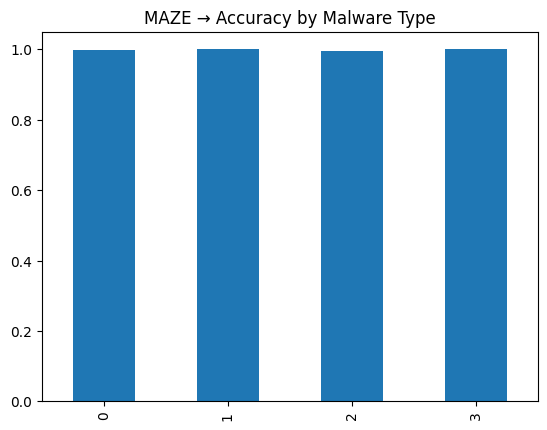

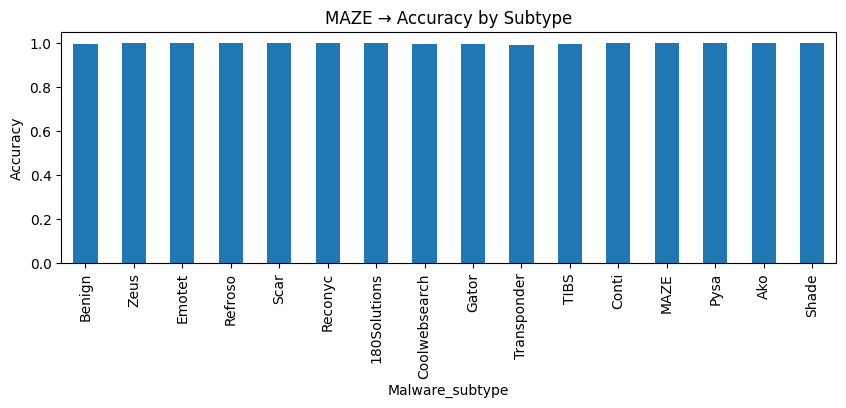

(0    0.998089
 1    0.999368
 2    0.995210
 3    0.999514
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.998089
 Zeus             0.998462
 Emotet           0.999492
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.998726
 180Solutions     0.998500
 Coolwebsearch    0.994500
 Gator            0.997727
 Transponder      0.990456
 TIBS             0.995745
 Conti            0.998994
 MAZE             1.000000
 Pysa             0.998835
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [47]:
feats = feature_importance_lgb("MAZE")
train_predict_novel_lgb("MAZE", feats)


=== Pysa (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27925
     Malware       1.00      1.00      1.00     27925

    accuracy                           1.00     55850
   macro avg       1.00      1.00      1.00     55850
weighted avg       1.00      1.00      1.00     55850

Accuracy: 0.99817


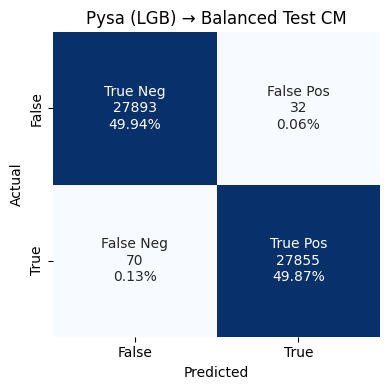

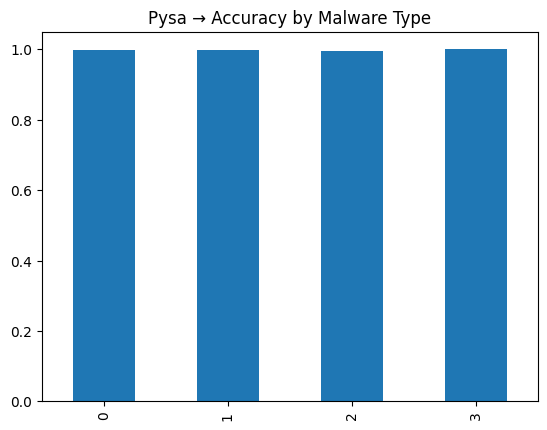

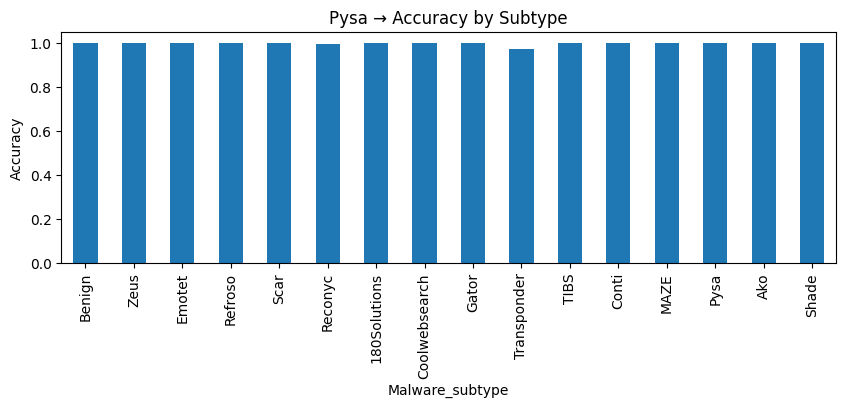

(0    0.998854
 1    0.999051
 2    0.994012
 3    0.999881
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.998854
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.994268
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.975104
 TIBS             1.000000
 Conti            0.999497
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [48]:
feats = feature_importance_lgb("Pysa")
train_predict_novel_lgb("Pysa", feats)


=== Shade (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27596
     Malware       1.00      1.00      1.00     27596

    accuracy                           1.00     55192
   macro avg       1.00      1.00      1.00     55192
weighted avg       1.00      1.00      1.00     55192

Accuracy: 0.99801


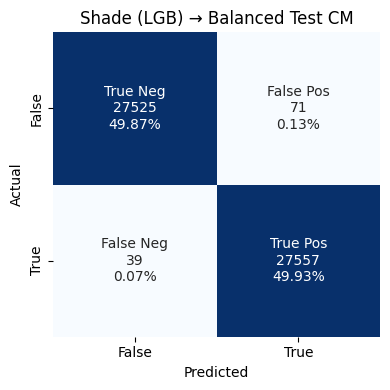

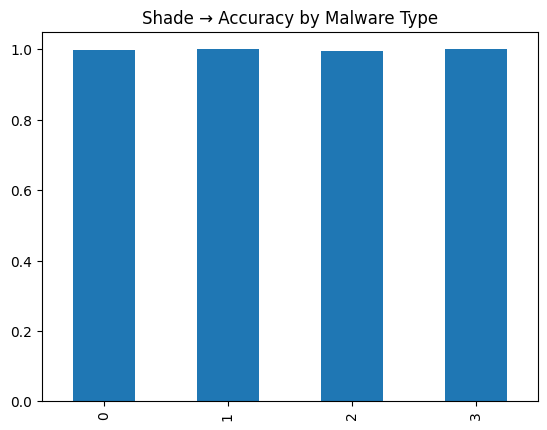

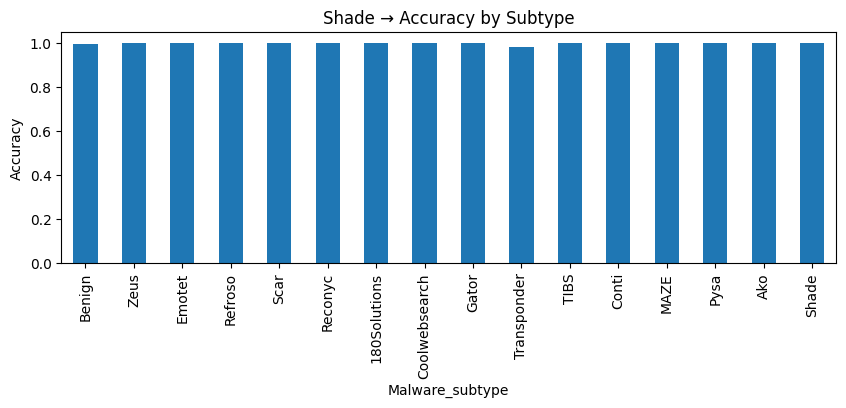

(0    0.997427
 1    0.999895
 2    0.996208
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.997427
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.999363
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.984232
 TIBS             1.000000
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [49]:
feats = feature_importance_lgb("Ako")
train_predict_novel_lgb("Shade", feats)


=== Shade (LGB) zero-shot ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27596
     Malware       1.00      1.00      1.00     27596

    accuracy                           1.00     55192
   macro avg       1.00      1.00      1.00     55192
weighted avg       1.00      1.00      1.00     55192

Accuracy: 0.99826


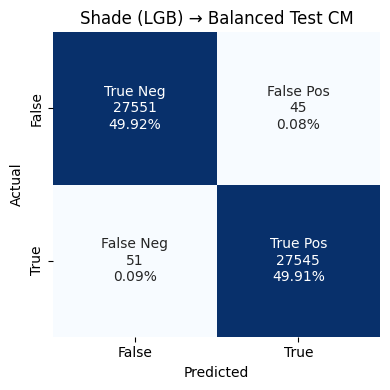

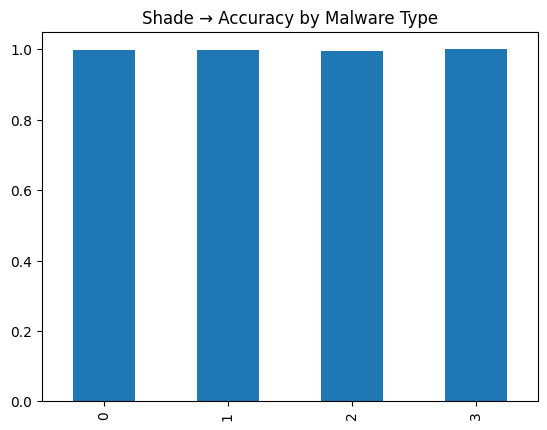

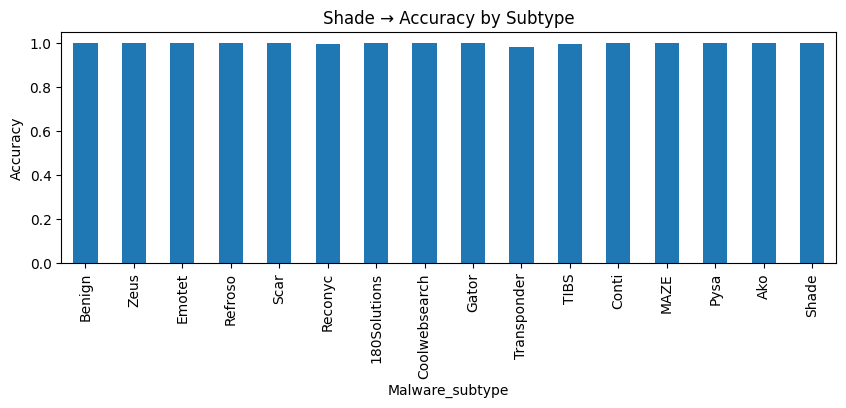

(0    0.998369
 1    0.999473
 2    0.995409
 3    1.000000
 Name: Pred, dtype: float64,
 Malware_subtype
 Benign           0.998369
 Zeus             1.000000
 Emotet           1.000000
 Refroso          1.000000
 Scar             1.000000
 Reconyc          0.996815
 180Solutions     1.000000
 Coolwebsearch    1.000000
 Gator            1.000000
 Transponder      0.982158
 TIBS             0.997872
 Conti            1.000000
 MAZE             1.000000
 Pysa             1.000000
 Ako              1.000000
 Shade            1.000000
 Name: Pred, dtype: float64)

In [50]:
feats = feature_importance_lgb("Shade")
train_predict_novel_lgb("Shade", feats)